<a href="https://colab.research.google.com/github/mtofighi/RoadCollisions/blob/master/RoadCollision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Canada Road Collision**

> National Collision Database 1999 to 2017 <br>
> Source: https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a

>>https://opendatatc.blob.core.windows.net/opendatatc/NCDB_1999_to_2017.csv

> Let’s now take a look at our dataset attributes and understand their meaning and significance.

| Data element 	| Type 	| Code  | Definition 	|
|-----------------------	|-----------------------	|----------------------------	|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| C_YEAR 	| int64 	| 19yy-20yy  | Year of the collision 	|
| C_MNTH 	| int64 	| 01-12, UU, XX |Month of the collision  	|
| C_WDAY | int64 | 1-7, U, X | Weekday of the collision  	|
| C_HOUR | int64 | 00-23, UU, XX  |Hour of the collision  	|
| C_SEV | category | 1,2, U, X |  The collision severity <br> 1: Collision producing at least one fatality <br> 2: Collision producing non-fatal injury) |
| C_VEHS|int64 | 1-98,99, UU, XX | Number of vehicles involved in collision|
| C_CONF| category |01-06 , 21-25 , 31-36 , 41 , QQ, UU, XX |  Collision configuration|
| C_RCFG| category |01-12 , QQ, UU, XX |Roadway configuration|
| C_WTHR | category| 1-7 , Q , U , X|Weather condition|
| C_RSUR | category|1-9 , Q , U , X|Road surface|
| C_RALN | category| 1-6 , Q , U , X|Road alignment|
| C_TRAF | category| 01-18, UU, XX|Traffic control|
| V_ID | int64 | 1-98,99, UU|Vehicle sequence number|
| V_TYPE | category |00-23, NN, QQ, UU, XX|Vehicle type|
| V_YEAR | int64 | 19yy-20yy , NNNN , UUUU , XXXX|Vehicle model year|
| P_ID | int64 | 01 - 99 , NN , UU|Person sequence number|
| P_SEX | category | F , M , N , U , X|Person sex|
| P_AGE | int64 | 00 , 01 – 98 , 99 , NN , UU , XX|Person age|
| P_PSN | category |11-13 , 21-23 , 31-33 , 96-99 , NN, QQ, UU, XX|Person position|
| P_ISEV | category| 1-3 , N , U , X|Medical treatment required <br> 1: No Injury <br> 2: Injury  <br> 3: Fatality|
| P_SAFE | category |01 , 02 , 09-13 , NN, QQ, UU, XX|Safety device used|
| P_USER | category |1-5 , U|Road user class|
| C_CASE|int64 |  a number, starting from 752 |seems to be the index of data|


We have a total of 22 features and our objective is to predict the dependency of the sevirity of a collison (P_ISEV) to these features we will be building and interpreting a classification model.

## **0- Import or Install Libraries and General Settings**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # for plot
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

## **NNNNNNNNNNNNNNNN0.1- for plot  xgboost










In [ ]:
# This part is for beter interpretation on results
# Only for Method of xgboost
!pip install shap
!pip install eli5

import shap
import eli5
!pip install skater

shap.initjs()
#  install required libraries          # to include Basian Analysis
#  !pip install pomegranate

## **1- Load Data**
Select One of the methods based on the work progress:

A- Data from Main Source [this URL](https://opendatatc.blob.core.windows.net/opendatatc/NCDB_1999_to_2017.csv) <br>
B- Full Data from Backup on My Ryerson Google Drive <br>
C- Backup Data for Year 2017 in this Github Repository [this Link](https://github.com/mtofighi/RoadCollisions/blob/master/NCDB_2017.csv?raw=true) <br>
D- Upload Data from Desktop to Drive (2017)  <br>
E- Cleaned and Dropped Data  in this Github Repository [this Link](https://raw.githubusercontent.com/mtofighi/RoadCollisions/master/two_vehic_df.csv)


In [2]:
# A- Online Data (1999-2017)
!wget https://opendatatc.blob.core.windows.net/opendatatc/NCDB_1999_to_2017.csv
df_read = pd.read_csv("NCDB_1999_to_2017.csv")

--2021-10-16 04:22:44--  https://opendatatc.blob.core.windows.net/opendatatc/NCDB_1999_to_2017.csv
Resolving opendatatc.blob.core.windows.net (opendatatc.blob.core.windows.net)... 52.239.190.36
Connecting to opendatatc.blob.core.windows.net (opendatatc.blob.core.windows.net)|52.239.190.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 535032631 (510M) [application/vnd.ms-excel]
Saving to: ‘NCDB_1999_to_2017.csv.1’

NCDB_1999_to_2017.c 100%[===================>] 510.25M  3.39MB/s    in 2m 22s  

2021-10-16 04:25:07 (3.59 MB/s) - ‘NCDB_1999_to_2017.csv.1’ saved [535032631/535032631]



In [ ]:
## B- from google.colab import drive
# drive.mount('/content/drive')
# cd /content/drive/Shared\ drives/Mohammadali/RoadCollision
# ls
# df_read = pd.read_csv("NCDB_1999_to_2017.csv")

In [ ]:
## C- Online Data (2017)
#!wget https://github.com/mtofighi/RoadCollisions/blob/master/NCDB_2017.csv?raw=true -O NCDB_2017.csv
# df_read = pd.read_csv("NCDB_2017.csv")

In [ ]:
## D- Upload data from desktop to drive (2017)
## Path in my desktop: C:\Users\Ali\Documents\_MyDrive\University\York\Projects Data\First Responders Accidents\Data-(1999-2017)
# df_read = pd.read_csv("NCDB_2017.csv")

In [ ]:
## E- Upload data from desktop to drive (2017)
# two_vehic_df = pd.read_csv("https://raw.githubusercontent.com/mtofighi/RoadCollisions/master/two_vehic_df.csv")
# two_vehic_df=two_vehic_df.drop('Unnamed: 0', axis=1)
# two_vehic_df.head(2)

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,V_AGE
0,1,1,0,2,1,1,5,1,18,1,0,25,11,2,2,1,6
1,1,1,18,2,1,1,3,3,18,1,0,34,11,2,2,1,12


### **1-1- Assign Loaded Data to Working Dataframe** _(Only for data loading methods A to D)_

In [3]:
df = df_read
df.info()
df.loc[1:2,:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6772563 entries, 0 to 6772562
Data columns (total 23 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   C_YEAR  int64 
 1   C_MNTH  object
 2   C_WDAY  object
 3   C_HOUR  object
 4   C_SEV   int64 
 5   C_VEHS  object
 6   C_CONF  object
 7   C_RCFG  object
 8   C_WTHR  object
 9   C_RSUR  object
 10  C_RALN  object
 11  C_TRAF  object
 12  V_ID    object
 13  V_TYPE  object
 14  V_YEAR  object
 15  P_ID    object
 16  P_SEX   object
 17  P_AGE   object
 18  P_PSN   object
 19  P_ISEV  object
 20  P_SAFE  object
 21  P_USER  object
 22  C_CASE  int64 
dtypes: int64(3), object(20)
memory usage: 1.2+ GB


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
1,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,01,M,19,11,1,UU,1,752
2,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,02,F,20,13,2,02,2,752



### **1-2- Basic Feature Engineering** _(Only for data loading methods A to D)_
> Here we convert the object type data columns to categorical or numericals based on the above table data and eliminate the uknown values.


In [4]:
%%time
print('-------------------------------------------------------------------------')
print('The number of rows for "df" DataFrame is               ', df['C_YEAR'].count())
from2013to2017 = df[ df.C_YEAR > 2012 ] # ############################################################# > 2012 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
print('The number of rows for "df" DataFrame is > 2012        ', from2013to2017['C_YEAR'].count())
print('-------------------------------------------------------------------------')
Only_two_vehic_untidy = df[df.C_CONF == '41']
print('The number of rows for "Only_two_vehic_untidy" DataFrame is         ', Only_two_vehic_untidy['C_YEAR'].count())
Only_two_vehic_untidy = from2013to2017[from2013to2017.C_CONF == '41']
print('The number of rows for "Only_two_vehic_untidy" DataFrame is (> 2012)', Only_two_vehic_untidy['C_YEAR'].count())
del Only_two_vehic_untidy
print('-------------------------------------------------------------------------')
## Cleaning and Controling data step by Step
#clean_mnth = df[ ( (df.C_MNTH != 'UU') & (df.C_MNTH != 'XX') ) ]                           # type int64 / month cleaned
clean_mnth = from2013to2017[ ( (from2013to2017.C_MNTH != 'UU') & (from2013to2017.C_MNTH != 'XX') ) ]         ####### > 2012 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
print('The number of rows for "df" DataFrame is > 2012        ', from2013to2017['C_YEAR'].count())
print('The number of rows for "clean_mnth" DataFrame is       ', clean_mnth['C_YEAR'].count())
clean_wday=clean_mnth[ ( (clean_mnth.C_WDAY != 'U') & (clean_mnth.C_WDAY != 'X') ) ]     # type int64 / weekday cleaned
del clean_mnth
print('The number of rows for "clean_wday" DataFrame is ', clean_wday['C_YEAR'].count())
clean_hour=clean_wday[ ( (clean_wday.C_HOUR != 'UU') & (clean_wday.C_HOUR != 'XX') ) ]   # type int64 / hour cleaned
del clean_wday
print('The number of rows for "clean_hour" DataFrame is ', clean_hour['C_YEAR'].count())
clean_vehs=clean_hour[ ( (clean_hour.C_VEHS != 'UU') & (clean_hour.C_VEHS != 'XX') ) ]   # type int64 / C_VEHS cleaned
del clean_hour
print('The number of rows for "clean_vehs" DataFrame is ', clean_vehs['C_YEAR'].count())
# ------------------------------------------------------------------------------------
# Only Hit a parked motor vehicle
# C_CONF type category
two_vehic_untidy = clean_vehs[clean_vehs.C_CONF == '41'] 
del clean_vehs
print('The number of rows for "two_vehic_untidy" DataFrame is  ', two_vehic_untidy['C_YEAR'].count())
# V_ID type int64
two_vehic_untidy_vid_cl = two_vehic_untidy[ ( (two_vehic_untidy.V_ID != 'UU') ) ]
del two_vehic_untidy
print('The number of rows for "two_vehic_untidy_vid_cl" DataFrame is  ', two_vehic_untidy_vid_cl['C_YEAR'].count()) 
# V_YEAR type int64
two_vehic_untidy_vye_cl = two_vehic_untidy_vid_cl[ ( ( (two_vehic_untidy_vid_cl.V_YEAR != 'UUUU') & (two_vehic_untidy_vid_cl.V_YEAR != 'XXXX') ) ) & (two_vehic_untidy_vid_cl.V_YEAR != 'NNNN')  ]
del two_vehic_untidy_vid_cl
print('The number of rows for "two_vehic_untidy_vye_cl" DataFrame is  ', two_vehic_untidy_vye_cl['C_YEAR'].count())
# P_ID type int64
two_vehic_untidy_pid_cl = two_vehic_untidy_vye_cl[ ( (two_vehic_untidy_vye_cl.P_ID != 'NN') & (two_vehic_untidy_vye_cl.P_ID != 'UU' ) ) ]
del two_vehic_untidy_vye_cl
print('The number of rows for "two_vehic_untidy_pid_cl" DataFrame is  ', two_vehic_untidy_pid_cl['C_YEAR'].count())
# P_SEX type category
two_vehic_untidy_sex_cl = two_vehic_untidy_pid_cl[ (  ( (two_vehic_untidy_pid_cl.P_SEX != 'U') & (two_vehic_untidy_pid_cl.P_SEX != 'X') ) ) & (two_vehic_untidy_pid_cl.P_SEX != 'N')  ]
del two_vehic_untidy_pid_cl
print('The number of rows for "two_vehic_untidy_sex_cl" DataFrame is  ', two_vehic_untidy_sex_cl['C_YEAR'].count())
# C_SEV type category
two_vehic_untidy_sev_cl = two_vehic_untidy_sex_cl[ ( (two_vehic_untidy_sex_cl.C_SEV != 'U') & (two_vehic_untidy_sex_cl.C_SEV != 'X') )  ] 
del two_vehic_untidy_sex_cl
print('The number of rows for "two_vehic_untidy_sev_cl" DataFrame is  ', two_vehic_untidy_sev_cl['C_YEAR'].count())
# C_RCFG type category
two_vehic_untidy_rcf_cl = two_vehic_untidy_sev_cl[ ( ( (two_vehic_untidy_sev_cl.C_RCFG != 'QQ') & (two_vehic_untidy_sev_cl.C_RCFG != 'UU') ) ) & (two_vehic_untidy_sev_cl.C_RCFG != 'XX')  ]
del two_vehic_untidy_sev_cl
print('The number of rows for "two_vehic_untidy_rcf_cl" DataFrame is  ', two_vehic_untidy_rcf_cl['C_YEAR'].count())
# C_WTHR type category
two_vehic_untidy_wth_cl = two_vehic_untidy_rcf_cl[ ( ( (two_vehic_untidy_rcf_cl.C_WTHR != 'Q') & (two_vehic_untidy_rcf_cl.C_WTHR != 'U') ) ) & (two_vehic_untidy_rcf_cl.C_WTHR != 'X')  ]
del two_vehic_untidy_rcf_cl
print('The number of rows for "two_vehic_untidy_wth_cl" DataFrame is  ', two_vehic_untidy_wth_cl['C_YEAR'].count())
# C_RSUR type category
two_vehic_untidy_rsu_cl = two_vehic_untidy_wth_cl[ ( ( (two_vehic_untidy_wth_cl.C_RSUR != 'Q') & (two_vehic_untidy_wth_cl.C_RSUR != 'U') ) ) & (two_vehic_untidy_wth_cl.C_RSUR != 'X')  ]
del two_vehic_untidy_wth_cl
print('The number of rows for "two_vehic_untidy_rsu_cl" DataFrame is  ', two_vehic_untidy_rsu_cl['C_YEAR'].count())
# C_RALN type category
two_vehic_untidy_ran_cl = two_vehic_untidy_rsu_cl[ ( ( (two_vehic_untidy_rsu_cl.C_RALN != 'Q') & (two_vehic_untidy_rsu_cl.C_RALN != 'U') ) ) & (two_vehic_untidy_rsu_cl.C_RALN != 'X')  ]
del two_vehic_untidy_rsu_cl
print('The number of rows for "two_vehic_untidy_ran_cl" DataFrame is  ', two_vehic_untidy_ran_cl['C_YEAR'].count())
# C_TRAF type category
two_vehic_untidy_tra_cl = two_vehic_untidy_ran_cl[ ( ( (two_vehic_untidy_ran_cl.C_TRAF != 'QQ') & (two_vehic_untidy_ran_cl.C_TRAF != 'UU') ) ) & (two_vehic_untidy_ran_cl.C_TRAF != 'XX')  ]
del two_vehic_untidy_ran_cl
print('The number of rows for "two_vehic_untidy_tra_cl" DataFrame is  ', two_vehic_untidy_tra_cl['C_YEAR'].count())
# V_TYPE type category
two_vehic_untidy_typ_cl = two_vehic_untidy_tra_cl[ ( ( (two_vehic_untidy_tra_cl.V_TYPE != 'NN') & (two_vehic_untidy_tra_cl.V_TYPE != 'QQ') ) ) & ( (two_vehic_untidy_tra_cl.V_TYPE != 'UU') & (two_vehic_untidy_tra_cl.V_TYPE != 'XX') )  ]
del two_vehic_untidy_tra_cl
print('The number of rows for "two_vehic_untidy_typ_cl" DataFrame is  ', two_vehic_untidy_typ_cl['C_YEAR'].count())
# P_AGE type int64
two_vehic_untidy_age_cl = two_vehic_untidy_typ_cl[ (  ( (two_vehic_untidy_typ_cl.P_AGE != 'UU') & (two_vehic_untidy_typ_cl.P_AGE != 'XX') ) ) & (two_vehic_untidy_typ_cl.P_AGE != 'NN')  ]
del two_vehic_untidy_typ_cl
print('The number of rows for "two_vehic_untidy_age_cl" DataFrame is  ', two_vehic_untidy_age_cl['C_YEAR'].count())
# P_PSN type category
two_vehic_untidy_psn_cl = two_vehic_untidy_age_cl[ ( ( (two_vehic_untidy_age_cl.P_PSN != 'NN') & (two_vehic_untidy_age_cl.P_PSN != 'QQ') ) ) & ( (two_vehic_untidy_age_cl.P_PSN != 'UU') & (two_vehic_untidy_age_cl.P_PSN != 'XX') )  ]
del two_vehic_untidy_age_cl
print('The number of rows for "two_vehic_untidy_psn_cl" DataFrame is  ', two_vehic_untidy_psn_cl['C_YEAR'].count())
# P_ISEV type category
two_vehic_untidy_ise_cl = two_vehic_untidy_psn_cl[ (  ( (two_vehic_untidy_psn_cl.P_ISEV != 'U') & (two_vehic_untidy_psn_cl.P_ISEV != 'X') ) ) & (two_vehic_untidy_psn_cl.P_ISEV != 'N')  ]
del two_vehic_untidy_psn_cl
print('The number of rows for "two_vehic_untidy_ise_cl" DataFrame is  ', two_vehic_untidy_ise_cl['C_YEAR'].count())
# P_SAFE type category
two_vehic_untidy_sav_cl = two_vehic_untidy_ise_cl[ (  ( (two_vehic_untidy_ise_cl.P_SAFE != 'UU') & (two_vehic_untidy_ise_cl.P_SAFE != 'XX') ) ) & ( (two_vehic_untidy_ise_cl.P_SAFE != 'QQ') & (two_vehic_untidy_ise_cl.P_SAFE != 'NN') ) ]
del two_vehic_untidy_ise_cl
print('The number of rows for "two_vehic_untidy_sav_cl" DataFrame is  ', two_vehic_untidy_sav_cl['C_YEAR'].count())
# P_USER type category
two_vehic_untidy_use_cl = two_vehic_untidy_sav_cl[ (two_vehic_untidy_sav_cl.P_USER != 'U') ]
del two_vehic_untidy_sav_cl
print('The number of rows for "two_vehic_untidy_use_cl" DataFrame is  ', two_vehic_untidy_use_cl['C_YEAR'].count())
# Cleaned data
two_vehic_df = two_vehic_untidy_use_cl
del two_vehic_untidy_use_cl
print('-------------------------------------------------------------------------')
print('The number of rows for "two_vehic_df" DataFrame is  ', two_vehic_df['C_YEAR'].count())
print('-------------------------------------------------------------------------')
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
print('-------------------------------------------------------------------------')
# Replace the "Sex" category by "Number" category to solve the error in next code
two_vehic_df = two_vehic_df.replace('M','0')
two_vehic_df = two_vehic_df.replace('F','1')

two_vehic_df[['C_YEAR','C_MNTH', 'C_WDAY' , 'C_HOUR', 'C_VEHS' , 'V_ID' , 'V_YEAR' , 'P_ID' , 'P_AGE','C_CASE']] = two_vehic_df[['C_YEAR','C_MNTH', 'C_WDAY' , 'C_HOUR', 'C_VEHS' , 'V_ID' , 'V_YEAR' , 'P_ID' , 'P_AGE','C_CASE']].apply(pd.to_numeric)
two_vehic_df[['C_SEV','C_CONF', 'C_RCFG' , 'C_WTHR', 'C_RSUR' , 'C_RALN' , 'C_TRAF' , 'V_TYPE' , 'P_SEX' , 'P_PSN' , 'P_ISEV' ,	'P_SAFE' ,	'P_USER' ]] = two_vehic_df[['C_SEV','C_CONF', 'C_RCFG' , 'C_WTHR', 'C_RSUR' , 'C_RALN' , 'C_TRAF' , 'V_TYPE' , 'P_SEX' , 'P_PSN' , 'P_ISEV' ,	'P_SAFE' ,	'P_USER' ]].astype('category')
two_vehic_df['V_AGE']=two_vehic_df['C_YEAR'] - two_vehic_df['V_YEAR'] + 1
number_of_data = two_vehic_df['C_YEAR'].count()
two_vehic_df.info()

-------------------------------------------------------------------------
The number of rows for "df" DataFrame is                6772563
The number of rows for "df" DataFrame is > 2012         1526265
-------------------------------------------------------------------------
The number of rows for "Only_two_vehic_untidy" DataFrame is          92856
The number of rows for "Only_two_vehic_untidy" DataFrame is (> 2012) 20156
-------------------------------------------------------------------------
The number of rows for "df" DataFrame is > 2012         1526265
The number of rows for "clean_mnth" DataFrame is        1526175
The number of rows for "clean_wday" DataFrame is  1526170
The number of rows for "clean_hour" DataFrame is  1514948
The number of rows for "clean_vehs" DataFrame is  1514930
The number of rows for "two_vehic_untidy" DataFrame is   19955
The number of rows for "two_vehic_untidy_vid_cl" DataFrame is   19955
The number of rows for "two_vehic_untidy_vye_cl" DataFrame is   1

In [5]:
print('Number of data before 2017:   ',Counter(df['C_YEAR'] < 2017))
print('Number of collision leads to fatality:   ',Counter(df['P_ISEV'] == '3'))
print('Number of collision two_vehic_df leads to fatality:   ',Counter(two_vehic_df['P_ISEV'] == '3'))
# print(Counter(df[df['C_YEAR'] < 2017]))

Number of data before 2017:    Counter({True: 6482722, False: 289841})
Number of collision leads to fatality:    Counter({False: 6726547, True: 46016})
Number of collision two_vehic_df leads to fatality:    Counter({False: 6375, True: 24})


#### **1-2-1- Check the P_ISEV Status** _(Only for data loading methods A to D)_

Counter({'2': 3547575, '1': 2744547, 'N': 331930, 'U': 102495, '3': 46016})


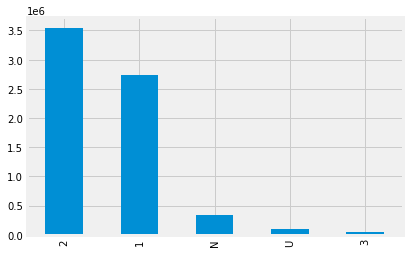

In [6]:
# In All Data 
df['P_ISEV'].value_counts().plot(kind='bar')
print(Counter(df['P_ISEV']))

2    4721
1    1654
3      24
Name: P_ISEV, dtype: int64


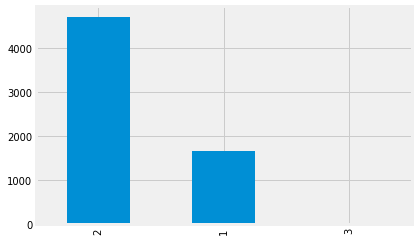

In [7]:
# In Cleaned Data 
print(two_vehic_df['P_ISEV'].value_counts())
two_vehic_df['P_ISEV'].value_counts().plot(kind='bar')

#### **1-2-2- Dropping Unuseful Columns** _(Only for data loading methods A to D)_ 
 
> In _`[  'C_YEAR'  ,  'C_SEV'  ,  'C_CONF'  ,  'V_ID'  ,  'V_YEAR'  ,  'P_ID'  ,  'C_CASE'  ]`_ columns there are no information to help the predict. Therefore, we drop them.  
After droping, the cleaned and pured data will be saved as `CSV file` in this Github repository [This link](https://raw.githubusercontent.com/mtofighi/RoadCollisions/master/two_vehic_df.csv))

In [8]:
two_vehic_df = two_vehic_df.drop( ['C_YEAR','C_SEV','C_CONF','V_ID','V_YEAR','P_ID','C_CASE'], axis=1)
two_vehic_df.info()
two_vehic_df.to_csv('two_vehic_df.csv')
# two_vehic_csv_df = two_vehic_df.drop( ['C_YEAR','C_SEV','C_CONF','V_ID','V_YEAR','P_ID','C_CASE'], axis=1)
# two_vehic_csv_df.info()
# two_vehic_csv_df.to_csv('two_vehic_df.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6399 entries, 5246480 to 6772040
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   C_MNTH  6399 non-null   int64   
 1   C_WDAY  6399 non-null   int64   
 2   C_HOUR  6399 non-null   int64   
 3   C_VEHS  6399 non-null   int64   
 4   C_RCFG  6399 non-null   category
 5   C_WTHR  6399 non-null   category
 6   C_RSUR  6399 non-null   category
 7   C_RALN  6399 non-null   category
 8   C_TRAF  6399 non-null   category
 9   V_TYPE  6399 non-null   category
 10  P_SEX   6399 non-null   category
 11  P_AGE   6399 non-null   int64   
 12  P_PSN   6399 non-null   category
 13  P_ISEV  6399 non-null   category
 14  P_SAFE  6399 non-null   category
 15  P_USER  6399 non-null   category
 16  V_AGE   6399 non-null   int64   
dtypes: category(11), int64(6)
memory usage: 422.1 KB


### **NNNNNNNNNNNNNNNNNNN1-3- Basic Feature Engineering for All Data** _(Only for data loading methods A to D)_
> Here we convert the object type data columns to categorical or numericals based on the above table data and eliminate the uknown values.

In [80]:
%%time
## Cleaning and Controling data step by Step
clean_mnth=df[ ( (df.C_MNTH != 'UU') & (df.C_MNTH != 'XX') ) ]                           # type int64 / month cleaned
print('The number of rows for "clean_mnth" DataFrame is ', clean_mnth['C_YEAR'].count())
clean_wday=clean_mnth[ ( (clean_mnth.C_WDAY != 'U') & (clean_mnth.C_WDAY != 'X') ) ]     # type int64 / weekday cleaned
del clean_mnth
print('The number of rows for "clean_wday" DataFrame is ', clean_wday['C_YEAR'].count())
clean_hour=clean_wday[ ( (clean_wday.C_HOUR != 'UU') & (clean_wday.C_HOUR != 'XX') ) ]   # type int64 / hour cleaned
del clean_wday
print('The number of rows for "clean_hour" DataFrame is ', clean_hour['C_YEAR'].count())
clean_vehs=clean_hour[ ( (clean_hour.C_VEHS != 'UU') & (clean_hour.C_VEHS != 'XX') ) ]   # type int64 / C_VEHS cleaned
del clean_hour
print('The number of rows for "clean_vehs" DataFrame is ', clean_vehs['C_YEAR'].count())
# ------------------------------------------------------------------------------------
# C_CONF type category
clean_conf =clean_vehs[ ( ( (clean_vehs.C_CONF != 'QQ') & (clean_vehs.C_CONF != 'UU') ) ) & (clean_vehs.C_CONF != 'XX')   ]   # type category / C_CONF cleaned
del clean_vehs
print('The number of rows for "clean_conf" DataFrame is ', clean_conf['C_YEAR'].count())
# V_ID type int64
clean_vid = clean_conf[ ( (clean_conf.V_ID != 'UU') ) ]
del clean_conf
print('The number of rows for "clean_vid" DataFrame is  ', clean_vid['C_YEAR'].count()) 
# V_YEAR type int64
clean_vye = clean_vid[ ( ( (clean_vid.V_YEAR != 'UUUU') & (clean_vid.V_YEAR != 'XXXX') ) ) & (clean_vid.V_YEAR != 'NNNN')  ]
print('The number of rows for "clean_vye" DataFrame is  ', clean_vye['C_YEAR'].count())
del clean_vid
# P_ID type int64
clean_pid = clean_vye[ ( (clean_vye.P_ID != 'NN') & (clean_vye.P_ID != 'UU' ) ) ]
print('The number of rows for "clean_pid" DataFrame is  ', clean_pid['C_YEAR'].count())
del clean_vye
# P_SEX type category
clean_pse = clean_pid[ (  ( (clean_pid.P_SEX != 'U') & (clean_pid.P_SEX != 'X') ) ) & (clean_pid.P_SEX != 'N')  ]
del clean_pid
print('The number of rows for "clean_pse" DataFrame is  ', clean_pse['C_YEAR'].count())
# C_SEV type category
clean_cse = clean_pse[ ( (clean_pse.C_SEV != 'U') & (clean_pse.C_SEV != 'X') )  ] 
del clean_pse
print('The number of rows for "clean_cse" DataFrame is  ', clean_cse['C_YEAR'].count())
# C_RCFG type category
clean_rcf = clean_cse[ ( ( (clean_cse.C_RCFG != 'QQ') & (clean_cse.C_RCFG != 'UU') ) ) & (clean_cse.C_RCFG != 'XX')  ]
del clean_cse
print('The number of rows for "clean_rcf" DataFrame is  ', clean_rcf['C_YEAR'].count())
# C_WTHR type category
clean_wth = clean_rcf[ ( ( (clean_rcf.C_WTHR != 'Q') & (clean_rcf.C_WTHR != 'U') ) ) & (clean_rcf.C_WTHR != 'X')  ]
del clean_rcf
print('The number of rows for "clean_wth" DataFrame is  ', clean_wth['C_YEAR'].count())
# C_RSUR type category
clean_rsu = clean_wth[ ( ( (clean_wth.C_RSUR != 'Q') & (clean_wth.C_RSUR != 'U') ) ) & (clean_wth.C_RSUR != 'X')  ]
del clean_wth
print('The number of rows for "clean_rsu" DataFrame is  ', clean_rsu['C_YEAR'].count())
# C_RALN type category
clean_ral = clean_rsu[ ( ( (clean_rsu.C_RALN != 'Q') & (clean_rsu.C_RALN != 'U') ) ) & (clean_rsu.C_RALN != 'X')  ]
del clean_rsu
print('The number of rows for "clean_ral" DataFrame is  ', clean_ral['C_YEAR'].count())
# C_TRAF type category
clean_tra = clean_ral[ ( ( (clean_ral.C_TRAF != 'QQ') & (clean_ral.C_TRAF != 'UU') ) ) & (clean_ral.C_TRAF != 'XX')  ]
del clean_ral
print('The number of rows for "clean_tra" DataFrame is  ', clean_tra['C_YEAR'].count())
# V_TYPE type category
clean_vty = clean_tra[ ( ( (clean_tra.V_TYPE != 'NN') & (clean_tra.V_TYPE != 'QQ') ) ) & ( (clean_tra.V_TYPE != 'UU') & (clean_tra.V_TYPE != 'XX') )  ]
del clean_tra
print('The number of rows for "clean_vty" DataFrame is  ', clean_vty['C_YEAR'].count())
# P_AGE type int64
clean_pag = clean_vty[ (  ( (clean_vty.P_AGE != 'UU') & (clean_vty.P_AGE != 'XX') ) ) & (clean_vty.P_AGE != 'NN')  ]
del clean_vty
print('The number of rows for "clean_pag" DataFrame is  ', clean_pag['C_YEAR'].count())
# P_PSN type category
clean_psn = clean_pag[ ( ( (clean_pag.P_PSN != 'NN') & (clean_pag.P_PSN != 'QQ') ) ) & ( (clean_pag.P_PSN != 'UU') & (clean_pag.P_PSN != 'XX') )  ]
del clean_pag
print('The number of rows for "clean_psn" DataFrame is  ', clean_psn['C_YEAR'].count())
# P_ISEV type category
clean_ise = clean_psn[ (  ( (clean_psn.P_ISEV != 'U') & (clean_psn.P_ISEV != 'X') ) ) & (clean_psn.P_ISEV != 'N')  ]
del clean_psn
print('The number of rows for "clean_ise" DataFrame is  ', clean_ise['C_YEAR'].count())
# P_SAFE type category
clean_psa = clean_ise[ (  ( (clean_ise.P_SAFE != 'UU') & (clean_ise.P_SAFE != 'XX') ) ) & ( (clean_ise.P_SAFE != 'QQ') & (clean_ise.P_SAFE != 'NN') ) ]
del clean_ise
print('The number of rows for "clean_psa" DataFrame is  ', clean_psa['C_YEAR'].count())
# P_USER type category
clean_pus = clean_psa[ (clean_psa.P_USER != 'U') ]
del clean_psa
print('The number of rows for "clean_pus" DataFrame is  ', clean_pus['C_YEAR'].count())
# Cleaned data
cleaned_df = clean_pus
del clean_pus
print('-------------------------------------------------------------------------')
print('The number of rows for "cleaned_df" DataFrame is  ', cleaned_df['C_YEAR'].count())
print('-------------------------------------------------------------------------')
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
print('-------------------------------------------------------------------------')
# Replace the "Sex" category by "Number" category to solve the error in next code
cleaned_df = cleaned_df.replace('M','0')
cleaned_df = cleaned_df.replace('F','1')

cleaned_df[['C_YEAR','C_MNTH', 'C_WDAY' , 'C_HOUR', 'C_VEHS' , 'V_ID' , 'V_YEAR' , 'P_ID' , 'P_AGE','C_CASE']] = cleaned_df[['C_YEAR','C_MNTH', 'C_WDAY' , 'C_HOUR', 'C_VEHS' , 'V_ID' , 'V_YEAR' , 'P_ID' , 'P_AGE','C_CASE']].apply(pd.to_numeric)
cleaned_df[['C_SEV','C_CONF', 'C_RCFG' , 'C_WTHR', 'C_RSUR' , 'C_RALN' , 'C_TRAF' , 'V_TYPE' , 'P_SEX' , 'P_PSN' , 'P_ISEV' ,	'P_SAFE' ,	'P_USER' ]] = cleaned_df[['C_SEV','C_CONF', 'C_RCFG' , 'C_WTHR', 'C_RSUR' , 'C_RALN' , 'C_TRAF' , 'V_TYPE' , 'P_SEX' , 'P_PSN' , 'P_ISEV' ,	'P_SAFE' ,	'P_USER' ]].astype('category')
cleaned_df['V_AGE']=cleaned_df['C_YEAR'] - cleaned_df['V_YEAR'] + 1
number_of_data_all = cleaned_df['C_YEAR'].count()
cleaned_df.info()

The number of rows for "clean_mnth" DataFrame is  6772138
The number of rows for "clean_wday" DataFrame is  6771199
The number of rows for "clean_hour" DataFrame is  6705408
The number of rows for "clean_vehs" DataFrame is  6705062
The number of rows for "clean_conf" DataFrame is  6173546
The number of rows for "clean_vid" DataFrame is   6173176
The number of rows for "clean_vye" DataFrame is   5618161
The number of rows for "clean_pid" DataFrame is   5605466
The number of rows for "clean_pse" DataFrame is   5435035
The number of rows for "clean_cse" DataFrame is   5435035
The number of rows for "clean_rcf" DataFrame is   4909137
The number of rows for "clean_wth" DataFrame is   4867694
The number of rows for "clean_rsu" DataFrame is   4756586
The number of rows for "clean_ral" DataFrame is   4711171
The number of rows for "clean_tra" DataFrame is   4581921
The number of rows for "clean_vty" DataFrame is   4555928
The number of rows for "clean_pag" DataFrame is   4455281
The number of 

## **NNNNNNNNNNNNNNNNNNNNNNNNNNN2- Method of  `xgboost`**

### **2-1- Building Train and Test Datasets**

> This part has been generated for better presentatiom of outputs. <br>
Here we convert the categorical columns with string values to numeric representations. Typically the XGBoost model can handle categorical data natively being a tree-based model so we don’t one-hot encode the features here.

In [ ]:
cat_cols = two_vehic_df.select_dtypes(['category']).columns
print()
two_vehic_df[cat_cols] = two_vehic_df[cat_cols].apply(lambda x: x.cat.codes)
two_vehic_df.head()

,Unnamed: 0,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,V_AGE
0,610,1,1,0,2,1,1,5,1,18,1,0,25,11,2,2,1,6
1,797,1,1,18,2,1,1,3,3,18,1,0,34,11,2,2,1,12
2,4969,1,2,22,6,2,2,3,1,1,1,0,22,11,2,2,1,15
3,5240,1,2,17,2,1,4,5,4,18,1,0,19,11,1,2,1,14
4,5450,1,2,6,2,1,2,5,4,18,7,0,37,11,2,2,1,26


In [ ]:
labels = two_vehic_df['P_ISEV']
features_data = two_vehic_df.drop('P_ISEV', axis=1)
print(labels.shape, features_data.shape)
#print(features_data.info())
# labels = np.array([int(label) for label in labels])
# print(labels)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_data, labels, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(Counter(labels))
# X_train.head(3)
# X_train.info()

(30255,) (30255, 17)
(21178, 17) (9077, 17)
Counter({2: 21904, 1: 8129, 3: 222})


#### **2-1-1-Training the Classification Model**

In [ ]:
%%time

import xgboost as xgb
xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc.fit(X_train, y_train)

CPU times: user 25.6 s, sys: 67.6 ms, total: 25.7 s
Wall time: 25.7 s


#### **2-1-2- Making Predictions on the Test Data**

Here we do the usual, use the trained model to make predictions on the test dataset.

In [ ]:
predictions = xgc.predict(X_test)
predictions[:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int8)

### **2-2- Presentation of Results**

#### **2-2-1- Default `xgc` Model Interpretation Methods**
**Classic feature importances from XGBoost**
>Here we try out the global feature importance calcuations that come with XGBoost. The model enables us to view feature importances based on the following.  
***Feature Weights***: This is based on the number of times a feature appears in a tree across the ensemble of trees  
***Gain:*** This is based on the average gain of splits which use the feature  
***Coverage:*** This is based on the average coverage (number of samples affected) of splits which use the feature

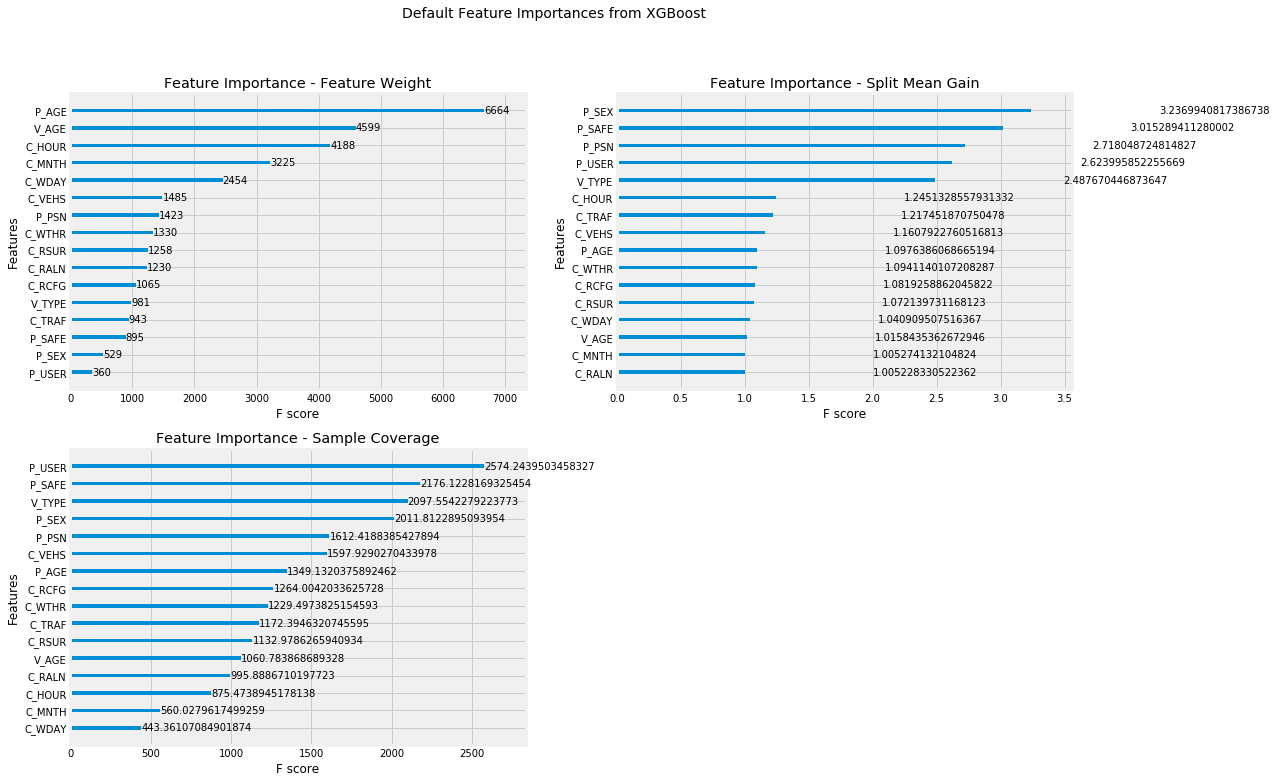

In [ ]:
fig = plt.figure(figsize = (16, 12))
title = fig.suptitle("Default Feature Importances from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2,2, 1)
xgb.plot_importance(xgc, importance_type='weight', ax=ax1 , color='blue', fontweight='bold', )
t=ax1.set_title("Feature Importance - Feature Weight")

ax2 = fig.add_subplot(2,2, 2)
xgb.plot_importance(xgc, importance_type='gain', ax=ax2)
t=ax2.set_title("Feature Importance - Split Mean Gain")

ax3 = fig.add_subplot(2,2, 3)
xgb.plot_importance(xgc, importance_type='cover', ax=ax3)
t=ax3.set_title("Feature Importance - Sample Coverage")

plt.savefig(os.path.join('Feature Importance - Sample Coverage.svg'), dpi=300, format='svg', bbox_inches='tight') # use format='svg' for vectorial pictures

#### **2-2-2- Feature Importances with ELI5**

Typically for tree-based models ELI5 does nothing special but uses the out-of-the-box feature importance computation methods which we discussed in the previous section. By default, ‘gain’ is used, that is the average gain of the feature when it is used in trees.

In [ ]:
eli5.show_weights(xgc.get_booster())

Weight,Feature
0.1239,P_SEX
0.1154,P_SAFE
0.1041,P_PSN
0.1005,P_USER
0.0952,V_TYPE
0.0477,C_HOUR
0.0466,C_TRAF
0.0444,C_VEHS
0.0420,P_AGE
0.0419,C_WTHR


#### **2-2-3- Feature Importances with Skater**

In [ ]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

interpreter = Interpretation(training_data=X_test, training_labels=y_test, 
                             feature_names=list(features_data.columns))
im_model = InMemoryModel(xgc.predict_proba, examples=X_train, 
                         target_names=['No Injury', 'Injury','Fatality'])

2019-11-27 01:57:45,100 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[16/16] features ████████████████████ Time elapsed: 23 seconds

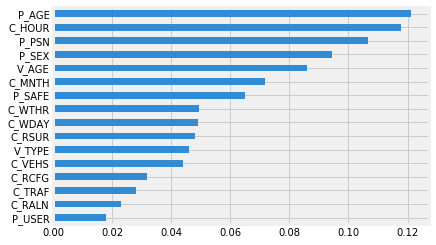

In [ ]:
plots = interpreter.feature_importance.plot_feature_importance(im_model, ascending=True,n_samples=23000) 

##### **2-2-3-1- Partial Dependence**

In [ ]:
r = interpreter.partial_dependence.plot_partial_dependence(['P_AGE'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=23000, 
                                                           with_variance=True, figsize = (6, 4))
yl = r[0][1].set_ylim(0, 1) 

#### **2-2-4- Explaining Model Predictions with Skater Using LIME**  
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgc_np = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                           objective='binary:logistic', random_state=42)
xgc_np.fit(X_train.values, y_train)

Model Interpretation with Skater

In [ ]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

exp = LimeTabularExplainer(X_test.values, feature_names=list(features_data.columns), 
                           discretize_continuous=True, 
                           class_names=['No Injury', 'Injury','Fatality'])

In [ ]:
doc_num = 0
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', predictions[doc_num])
exp.explain_instance(X_test.iloc[doc_num].values, xgc_np.predict_proba).show_in_notebook()

KeyError: ignored

## **3- Methods of  `Decision Tree`, `Random Forest`, ` Logistic Regression`, `Naive Bayes`, `k-NN`**

### 3-1- **Data Engineering**

#### **3-1-1- Create dummy variables based on all variable**

In [9]:
# cat_cols=[['C_MNTH',	'C_WDAY',	'C_HOUR',	'C_VEHS',	'C_RCFG',	'C_WTHR',	'C_RSUR',	'C_RALN',	'C_TRAF',	'V_TYPE',	'P_SEX',	'P_AGE',	'P_PSN',	'P_ISEV',	'P_SAFE',	'P_USER',	'V_AGE']
two_vehic_df[['C_MNTH',	'C_WDAY',	'C_HOUR',	'C_VEHS',	'C_RCFG',	'C_WTHR',	'C_RSUR',	'C_RALN',	'C_TRAF',	'V_TYPE',	'P_SEX',	'P_AGE',	'P_PSN',	'P_ISEV',	'P_SAFE',	'P_USER',	'V_AGE']] = two_vehic_df[['C_MNTH',	'C_WDAY',	'C_HOUR',	'C_VEHS',	'C_RCFG',	'C_WTHR',	'C_RSUR',	'C_RALN',	'C_TRAF',	'V_TYPE',	'P_SEX',	'P_AGE',	'P_PSN',	'P_ISEV',	'P_SAFE',	'P_USER',	'V_AGE']].apply(pd.to_numeric)
two_vehic_df.info()
cat_cols =[]
two_vehic_df_cat = pd.get_dummies(two_vehic_df, columns=cat_cols, drop_first=True)
two_vehic_df_cat.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6399 entries, 5246480 to 6772040
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   C_MNTH  6399 non-null   int64
 1   C_WDAY  6399 non-null   int64
 2   C_HOUR  6399 non-null   int64
 3   C_VEHS  6399 non-null   int64
 4   C_RCFG  6399 non-null   int64
 5   C_WTHR  6399 non-null   int64
 6   C_RSUR  6399 non-null   int64
 7   C_RALN  6399 non-null   int64
 8   C_TRAF  6399 non-null   int64
 9   V_TYPE  6399 non-null   int64
 10  P_SEX   6399 non-null   int64
 11  P_AGE   6399 non-null   int64
 12  P_PSN   6399 non-null   int64
 13  P_ISEV  6399 non-null   int64
 14  P_SAFE  6399 non-null   int64
 15  P_USER  6399 non-null   int64
 16  V_AGE   6399 non-null   int64
dtypes: int64(17)
memory usage: 899.9 KB


,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,V_AGE
5246480,1,1,13,2,1,1,5,1,18,1,1,57,11,2,2,1,7
5246511,1,1,6,2,1,1,2,1,18,1,1,54,11,2,2,1,4



#### **3-1-2- Balancing the Dataset**
https://elitedatascience.com/imbalanced-classes

> Downsample majority class

In [10]:
two_vehic_df_cat_majority = two_vehic_df_cat[two_vehic_df_cat.P_ISEV==2]
two_vehic_df_cat_minority = two_vehic_df_cat[two_vehic_df_cat.P_ISEV==1]
print(two_vehic_df_cat_majority.shape[0])
print(two_vehic_df_cat_minority.shape[0])

4721
1654


In [11]:
from sklearn.utils import resample
# Downsample majority class
two_vehic_df_cat_majority_downsampled = resample(two_vehic_df_cat_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=two_vehic_df_cat_minority.shape[0],     # to match minority class
                                 random_state=123) # reproducible results
two_vehic_df_cat_majority_downsampled.shape[0]

1654

In [12]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([two_vehic_df_cat_majority_downsampled, two_vehic_df_cat_minority])
df_downsampled.P_ISEV.value_counts()

1    1654
2    1654
Name: P_ISEV, dtype: int64

#### **3-1-3- Partition into train and test**
Use train_test_split from sklearn.model_selection to partition the dataset into 70% for training and 30% for testing.

You can use the 70% for training set as both training and validation by using cross-validation.

**Train and Test the model**  
P_ISEV:<br>

|Code| Description|
|---------|-----------|
|1|No Injury|
|2|Injury|
|3|Fatality	Died immediately or within the time limit.

In [13]:
target = 'P_ISEV' # Collision producing at least one injury
features = list(df_downsampled.columns)
features = [f for f in features if f!=target]
# Separate input features (X) and target variable (y)
X = df_downsampled[features]
y = df_downsampled[[target]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print(features)
print(X_train.shape)
print(y_train.shape) 
print(X_test.shape) 
print(y_test.shape)
# Make target variable in numpy array format of 0 or 1
y_train_b = 1*np.ravel(y_train)
y_test_b  = 1*np.ravel(y_test)

['C_MNTH', 'C_WDAY', 'C_HOUR', 'C_VEHS', 'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_TYPE', 'P_SEX', 'P_AGE', 'P_PSN', 'P_SAFE', 'P_USER', 'V_AGE']
(2315, 16)
(2315, 1)
(993, 16)
(993, 1)


#### **3-1-4- Scaling Data**

In [14]:
from sklearn.preprocessing import MinMaxScaler
# For all datapoints
min_max_scaler_all = MinMaxScaler()
#---------------------------------|
X_minmax = min_max_scaler_all.fit_transform(X)
X_scaled = pd.DataFrame(X_minmax, columns = X.columns)
#---------------------------------
print(min_max_scaler_all.scale_)
#---------------------------------|
print(X_scaled.shape)
#---------------------------------
# Just based on the training set
min_max_scaler = MinMaxScaler()
#---------------------------------|
X_train_minmax = min_max_scaler.fit_transform(X_train)
print(min_max_scaler.scale_)
X_tr_scaled = pd.DataFrame(X_train_minmax, columns = X_train.columns)

print(X_tr_scaled.shape)
#---------------------------------
# Just based on the test set
X_test_minmax = min_max_scaler.transform(X_test)
X_te_scaled = pd.DataFrame(X_test_minmax, columns = X_test.columns)
print(min_max_scaler.scale_)
#---------------------------------
print(y_train_b.shape)
print(X_tr_scaled.shape)

[0.09090909 0.16666667 0.04347826 0.07142857 0.125      0.16666667
 0.16666667 0.2        0.05882353 0.05       1.         0.01020408
 0.01162791 0.08333333 0.25       0.01923077]
(3308, 16)
[0.09090909 0.16666667 0.04347826 0.07142857 0.125      0.16666667
 0.2        0.2        0.05882353 0.05       1.         0.0106383
 0.01176471 0.08333333 0.25       0.01923077]
(2315, 16)
[0.09090909 0.16666667 0.04347826 0.07142857 0.125      0.16666667
 0.2        0.2        0.05882353 0.05       1.         0.0106383
 0.01176471 0.08333333 0.25       0.01923077]
(2315,)
(2315, 16)


### **3-2- Decision Tree**

#### **3-2-1- Cross Validation**


Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. You should get around 72% average accuracy across the n-folds.

**Use CV=10 in GridSearchDV**

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

params = {'criterion': ['gini','entropy'], 'max_leaf_nodes': [3,10,30,100,300,1000,3000], 'min_samples_split': [2, 10, 100], 
          'max_depth': [3,4, 5,6,7,8,10,12]}
dtree_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=10)

#---------------------------------|
dtree_cv.fit(X_tr_scaled, y_train_b)
#---------------------------------
print('dtree_cv.best_params are: ',dtree_cv.best_params_)
print('dtree_cv.best_score_ is: ',dtree_cv.best_score_) 

Fitting 10 folds for each of 336 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.0s


dtree_cv.best_params are:  {'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_split': 100}
dtree_cv.best_score_ is:  0.6405844155844156


[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed:    9.7s finished


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'criterion': ['gini','entropy'], 'max_leaf_nodes': [3,10,30,100,300,1000,3000], 'min_samples_split': [2, 10, 100], 
          'max_depth': [3,4]}
dtree_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=10)
#---------------------------------|
dtree_cv.fit(X_tr_scaled, y_train_b)
#---------------------------------
print('dtree_cv.best_params are: ',dtree_cv.best_params_)
print('dtree_cv.best_score_ is: ',dtree_cv.best_score_)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.0s


dtree_cv.best_params are:  {'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 10, 'min_samples_split': 2}
dtree_cv.best_score_ is:  0.623300119420809


[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:    2.0s finished


#### **3-1-2- Measure the performance of your best model on the test set**
By measuring the best model performance on the test set, if it is close enough to the validation accuracy after cross-validation, we can claim the model is generalized. As you can see, on the test set it us about 1% less than validation set (62.6% on train vs 62% on the test). Therefore, the model is generalized.

In [35]:
from sklearn.metrics import accuracy_score
#---------------------------------|
y_pred = dtree_cv.predict(X_te_scaled)
accuracy_score(y_test_b, y_pred)
#---------------------------------

0.6465256797583081

#### **3-1-3- Visualizing the Tree**
Let's makes the best tree and visualize it based on the best parameters offered by cross validation {'max_depth': 5, 'max_leaf_nodes': 30, 'min_samples_split': 2}.

By visualizing this decision tree, we can see the most important feature is ??????.

In [36]:
criterion = dtree_cv.best_params_['criterion']
max_depth = dtree_cv.best_params_['max_depth']
max_leaf_nodes = dtree_cv.best_params_['max_leaf_nodes']
min_samples_split = dtree_cv.best_params_['min_samples_split']

dtree=DecisionTreeClassifier(class_weight=None,
                                              criterion=criterion,
                                              max_depth=max_depth,
                                              max_features=None,
                                              max_leaf_nodes=max_leaf_nodes,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=min_samples_split,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best')

dtree.fit(X, y)

feature_names = list(X.columns)
class_names = list(y.columns)

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
export_graphviz(dtree, out_file='tree.dot',  feature_names=feature_names,class_names=['1','2'],filled=True, rounded=True,special_characters=True)

y_pred = dtree.predict(X)
accuracy_score(y, y_pred)

0.6363361547762999

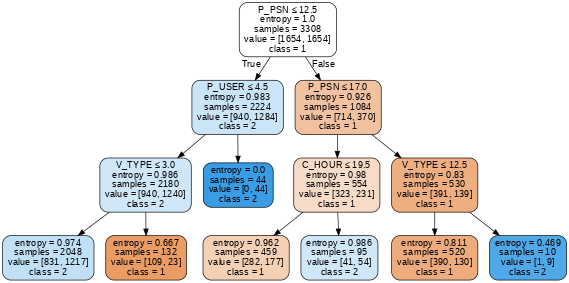

In [37]:
!dot -Tpng tree.dot -o tree.png -Gdpi=47
Image(filename = 'tree.png')

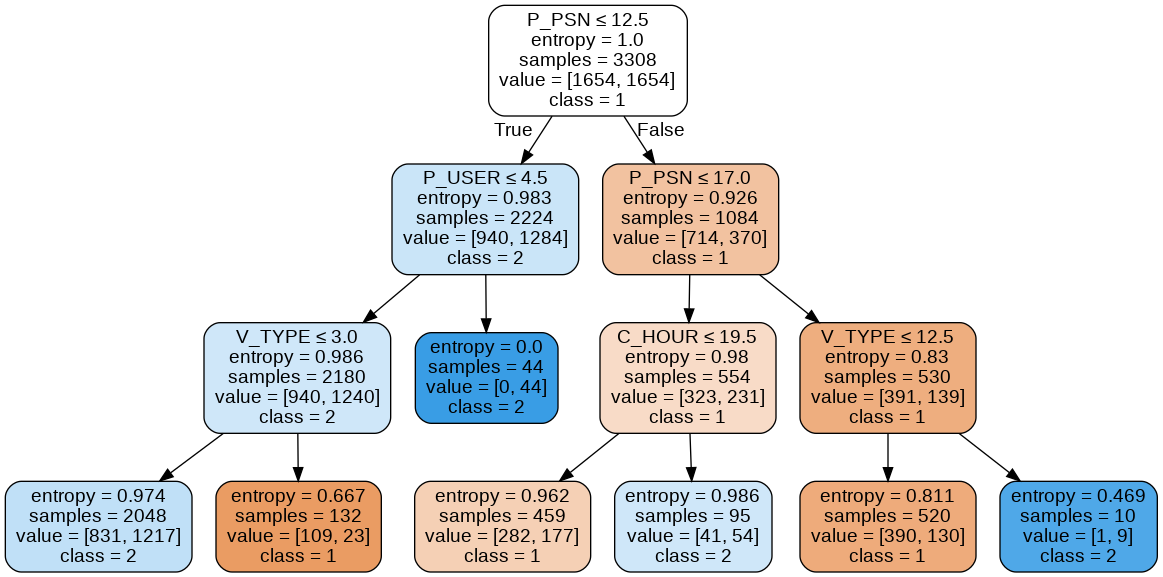

In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names,class_names=['1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('collision_decisiontree.png')
Image(graph.create_png())

### **3-3- Random Forest**

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Choose some parameter combinations to try
params = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
rf_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, scoring=acc_scorer, n_jobs=-1, verbose=1, cv=10)
#---------------------------------|
rf_grid_seaech = rf_cv.fit(X_tr_scaled,y_train_b)
#---------------------------------
# the best combination of parameters
print(f"rf_cv.best_params_:{rf_cv.best_params_}")

print( f"rf_cv.best_score_: {rf_cv.best_score_}")

# Test
#---------------------------------|
y_pred = rf_cv.predict(X_te_scaled)
accuracy_score(y_test_b, y_pred)
#---------------------------------
# Train the tuned RF on whole data
n_estimators = rf_cv.best_params_['n_estimators']
max_features = rf_cv.best_params_['max_features']
criterion = rf_cv.best_params_['criterion']
max_depth = rf_cv.best_params_['max_depth']
min_samples_leaf = rf_cv.best_params_['min_samples_leaf']
min_samples_split = rf_cv.best_params_['min_samples_split']

rf_tuned = RandomForestClassifier(random_state=42,
                                  n_estimators= n_estimators,
                                  criterion=criterion,
                                  max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf,
#---------------------------------|
                                  min_samples_split=min_samples_split).fit(X_tr_scaled,y_train_b)
print(f"Accuracy of the tuned model: {accuracy_score(y_test_b, rf_tuned.predict(X_te_scaled))}")
#---------------------------------|

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 3400 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 6200 tasks      | elapsed:   47.8s


rf_cv.best_params_:{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 9}
rf_cv.best_score_: 0.6375858337065233
Accuracy of the tuned model: 0.6535750251762337


[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:   50.3s finished


#### **3-3-1- Feature Importance**


P_AGE: 0.173
C_HOUR: 0.135
V_AGE: 0.13
C_MNTH: 0.107
C_WDAY: 0.0856
P_PSN: 0.0489
C_VEHS: 0.0462
C_WTHR: 0.0381
C_RSUR: 0.0357
V_TYPE: 0.0337
C_RALN: 0.0327
C_RCFG: 0.0292
P_SAFE: 0.028
C_TRAF: 0.027
P_SEX: 0.0251
P_USER: 0.0244


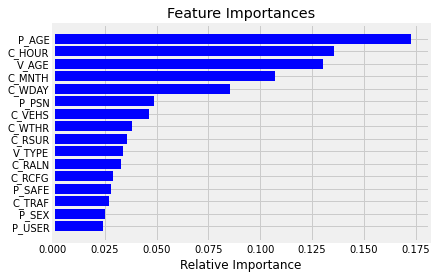

In [40]:
rnd_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
#---------------------------------|
rnd_clf.fit(X_scaled, y)
features = X.columns
#---------------------------------
feature_importance = {}
#---------------------------------|
for name, importance in zip(X.columns, rnd_clf.feature_importances_):
#---------------------------------
  feature_importance[name] = importance
  
feature_importance = [(k, feature_importance[k]) for k in sorted(feature_importance, key=feature_importance.get, reverse=True)]
for k, v in feature_importance:
  print(f"{k}: {v:.3}")

importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### **3-4- Logistic Regression**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression

params={'solver':['lbfgs'], 'C':np.logspace(-3,3,7), 'penalty':['l2', 'none']}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,params,n_jobs=-1, verbose=1, cv=10)
#---------------------------------|
logreg_cv.fit(X_tr_scaled,y_train)
#---------------------------------
print(f"Tuned hpyerparameters :(best parameters) {logreg_cv.best_params_}")
print(f"Accuracy of cross validation is {logreg_cv.best_score_}")
#---------------------------------|
print (f"Accuracy of test is {logreg_cv.score(X_te_scaled, y_test)}")
#---------------------------------
C = logreg_cv.best_params_['C']
penalty = logreg_cv.best_params_['penalty']
#---------------------------------|
logreg_tuned = LogisticRegression(random_state=42, solver='lbfgs',C=C, penalty=penalty ).fit(X_scaled, y)
print (f"Accuracy of tuned model is {logreg_cv.score(X_scaled, y)}")
#---------------------------------

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tuned hpyerparameters :(best parameters) {'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy of cross validation is 0.5908848335572474
Accuracy of test is 0.6022155085599195
Accuracy of tuned model is 0.6051995163240629


[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.4s finished


### **3-5- Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

params = {}
#---------------------------------|
nb_cv=GridSearchCV(GaussianNB(),params,n_jobs=-1, verbose=1, cv=5).fit(X_tr_scaled,y_train_b)
#---------------------------------
print(f"Accuracy of cross validation is {nb_cv.best_score_}")
#---------------------------------|
y_pred = nb_cv.predict(X_te_scaled)
accuracy_score(y_test_b, y_pred)
#---------------------------------

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy of cross validation is 0.5520518358531318


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.595166163141994

### **3-6- SVM**

In [ ]:
# from sklearn.svm import SVC
# params = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
# #---------------------------------|
# svc_cv=GridSearchCV(SVC(random_state=42,probability=True),params,n_jobs=-1, verbose=1, cv=10).fit(X_tr_scaled,y_train_b)
# #---------------------------------
# print(f"Tuned hpyerparameters :(best parameters) {svc_cv.best_params_}")
# print(f"Accuracy of cross validation is {svc_cv.best_score_}")
# #---------------------------------|
# y_pred = svc_cv.predict(X_te_scaled)
# accuracy_score(y_test_b, y_pred)
# #---------------------------------

### **3-7- k-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
# we create a list
weight_options = ['uniform', 'distance']
# create a parameter grid: map the parameter names to the values that should be searched
# dictionary = dict(key=values, key=values)
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)
#{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
# instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times
knn_cv = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
#---------------------------------|
knn_cv.fit(X_tr_scaled, y_train_b)
#---------------------------------
print(f"Tuned hpyerparameters :(best parameters) {knn_cv.best_params_}")
print(f"Accuracy of cross validation is {knn_cv.best_score_}")
#---------------------------------|
y_pred = knn_cv.predict(X_te_scaled)
print(accuracy_score(y_test_b, y_pred))
#---------------------------------

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}
Tuned hpyerparameters :(best parameters) {'n_neighbors': 28, 'weights': 'distance'}
Accuracy of cross validation is 0.6012763098969997
0.62134944612286


### **3-8- ROC curves**

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('ROC')

# colors = ['green','blue','red','orange','purple','pink']

# clfs ={  "Decision Tree": dtree_cv,
#          "Random Forest": rf_cv,
#          "Logistic Regression": logreg_cv,
#          "Support Vector Machines (SVM)": svc_cv,
#          "Gaussian Naive Bayes": nb_cv,
#          "K-nn": knn_cv
#       }
colors = ['green','blue','red','orange','pink']

clfs ={  "Decision Tree": dtree_cv,
         "Random Forest": rf_cv,
         "Logistic Regression": logreg_cv,
         "Gaussian Naive Bayes": nb_cv,
         "K-nn": knn_cv
      }

clr = 0
for name, clf in clfs.items():
  #---------------------------------|
  y_prob = clf.predict_proba(X_te_scaled)[:,1] # This will give you positive class prediction probabilities
  #--------------------------------- 
  y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
#---------------------------------|
  auc_roc=roc_auc_score(y_test,y_pred)
  print(confusion_matrix(y_test,y_pred))
  #---------------------------------
  print(f"auc_roc {name}: {auc_roc:.2f}")
#---------------------------------|
  fpr, tpr, thresholds = roc_curve(y_test, y_prob)
#---------------------------------
  roc_auc = auc(fpr, tpr)
  roc_auc
  plt.plot(fpr,tpr, color=colors[clr],label = f'AUC {name} = {roc_auc:.2f}')
  clr=clr+1
  plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## **3-9- Build and fit a classifier - Auto-Sklearn**

In [17]:
# https://automl.github.io/auto-sklearn/master/examples/40_advanced/example_calc_multiple_metrics.html#sphx-glr-examples-40-advanced-example-calc-multiple-metrics-py
!pip install auto-sklearn
import autosklearn
import autosklearn.classification
import numpy as np
import pandas as pd
import sklearn.datasets
import sklearn.metrics
from autosklearn.metrics import balanced_accuracy, precision, recall, f1

def error(solution, prediction):
    # custom function defining error
    return np.mean(solution != prediction)


def get_metric_result(cv_results):
    results = pd.DataFrame.from_dict(cv_results)
    results = results[results['status'] == "Success"]
    cols = ['rank_test_scores', 'param_classifier:__choice__', 'mean_test_score']
    cols.extend([key for key in cv_results.keys() if key.startswith('metric_')])
    return results[cols]
# # Data Loading

# X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
# X_train, X_test, y_train, y_test = \
#     sklearn.model_selection.train_test_split(X, y, random_state=1)

# Build and fit a classifier
error_rate = autosklearn.metrics.make_scorer(
    name='custom_error',
    score_func=error,
    optimum=0,
    greater_is_better=False,
    needs_proba=False,
    needs_threshold=False
)
cls = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    scoring_functions=[balanced_accuracy, precision, recall, f1, error_rate]
)
# cls.fit(X_train, y_train, X_test, y_test)
cls.fit(X_tr_scaled,y_train_b, X_te_scaled, y_test_b)

# Get the Score of the final ensemble
# predictions = cls.predict(X_test)
predictions = cls.predict(X_te_scaled)
#print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))
print("Accuracy score", sklearn.metrics.accuracy_score(y_test_b, predictions))
print("#" * 80)
print("Metric results")
print(get_metric_result(cls.cv_results_).to_string(index=False))

Accuracy score 0.6565961732124874
################################################################################
Metric results
 rank_test_scores param_classifier:__choice__  mean_test_score  metric_balanced_accuracy  metric_precision  metric_recall  metric_f1  metric_custom_error
                2               random_forest         0.621728                  0.621225          0.612022       0.603774   0.607870             0.378272
                3                         lda         0.620419                  0.623348          0.588621       0.725067   0.649758             0.379581
                8                 gaussian_nb         0.566754                  0.564169          0.564103       0.474394   0.515373             0.433246
               10                 gaussian_nb         0.540576                  0.536536          0.536496       0.396226   0.455814             0.459424
                4                 extra_trees         0.617801                  0.617937          0.

## **3-10- Tree-based Pipeline Optimization Tool (TPOT)**

In [18]:
!pip install tpot

# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)


# example of tpot for a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
# define dataset

#  X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
# perform the search
# model.fit(X, y)
model.fit(X_tr_scaled,y_train_b)
# export the best model
model.export('tpot_best_model.py')

  Using cached TPOT-0.11.7-py3-none-any.whl (87 kB)
     |████████████████████████████████| 160 kB 2.8 MB/s 
  Using cached update_checker-0.18.0-py3-none-any.whl (7.0 kB)
     |████████████████████████████████| 166.7 MB 4.2 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11952 sha256=2b7516a6541c01d5ac1d8a82368fa3f8cd5b663cd86bef584b2a1f6b4ce1e8e4
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
tpot: 0.11.7


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6387240632930288

Generation 2 - Current best internal CV score: 0.6410247798178834

Generation 3 - Current best internal CV score: 0.6410247798178834

Generation 4 - Current best internal CV score: 0.642476489028213

Generation 5 - Current best internal CV score: 0.642476489028213

Best pipeline: ExtraTreesClassifier(BernoulliNB(input_matrix, alpha=0.001, fit_prior=False), bootstrap=True, criterion=entropy, max_features=0.5, min_samples_leaf=6, min_samples_split=18, n_estimators=100)


## **4- Charts**

### **4-1- For Two Vehicle**

> This part has been generated for better presentatiom of outputs. <br>

6399
C_MNTH
1     8.204407
2     6.782310
3     8.298172
4     6.532271
5     8.204407
6     8.907642
7     9.814033
8     8.845132
9     8.735740
10    9.298328
11    8.735740
12    7.641819
Name: C_HOUR, dtype: float64


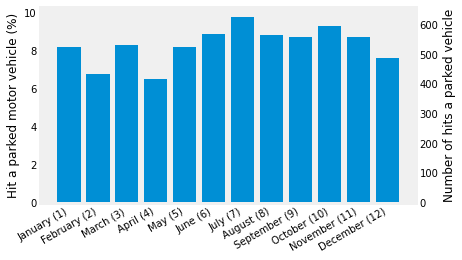

In [ ]:
## Chart 1 - Hit a parked vehicle variation in different months
number_of_data = two_vehic_df['C_MNTH'].count()
print(number_of_data)
#months = ['January','February','March','April','May','June','July','August','September','October','November','December']
months = ['January (1)','February (2)','March (3)','April (4)','May (5)','June (6)','July (7)','August (8)','September (9)','October (10)','November (11)','December (12)']
months_count = two_vehic_df.groupby('C_MNTH').count().iloc[:, 1]
months_percent = months_count / number_of_data * 100
print(months_percent)
x_data = months
y1_data = months_percent
y2_data = months_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'monthely'
#------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()         # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show()
fig.savefig((filename+'.svg'), format='svg', dpi=300)
#-------------------------------------------------------------------------------------

C_WDAY
1    13.252071
2    13.220816
3    13.330208
4    12.220659
5    16.658853
6    16.002500
7    15.314893
Name: C_HOUR, dtype: float64


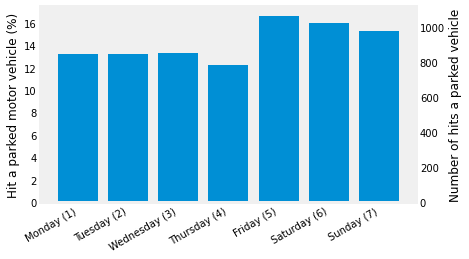

In [ ]:
## Chart 2 - Hit a parked vehicle variation in different day of week
number_of_data = two_vehic_df['C_MNTH'].count()
#week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
week_day = ['Monday (1)','Tuesday (2)','Wednesday (3)','Thursday (4)','Friday (5)','Saturday (6)','Sunday (7)']
week_day_count = two_vehic_df.groupby('C_WDAY').count().iloc[:, 1]
week_day_percent = week_day_count / number_of_data * 100
print(week_day_percent)
x_data = week_day
y1_data = week_day_percent
y2_data = week_day_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'week_day'
#------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
#-------------------------------------------------------------------------------------
# print(week_day_count , week_day_count.sum())

C_HOUR
0     2.937959
1     2.453508
2     2.719175
3     2.937959
4     2.297234
5     2.125332
6     2.109705
7     4.188154
8     5.563369
9     4.172527
10    4.625723
11    4.516331
12    4.735115
13    5.203938
14    5.750899
15    5.766526
16    5.516487
17    5.563369
18    5.704016
19    4.703860
20    4.110017
21    4.313174
22    4.297546
23    3.688076
Name: C_WDAY, dtype: float64


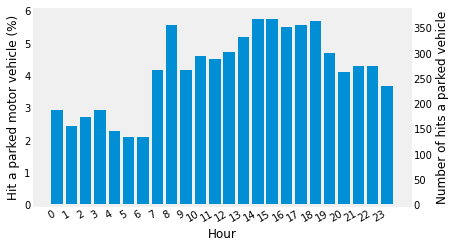

In [ ]:
## Chart 3 - Hit a parked vehicle variation in different times of a day
number_of_data = two_vehic_df['C_MNTH'].count()
hour = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
hour_count = two_vehic_df.groupby('C_HOUR').count().iloc[:, 1]
hour_percent = hour_count / number_of_data * 100
print(hour_percent)
x_data = hour
x_lable = 'Hour'
y1_data = hour_percent
y2_data = hour_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'times_of_a_day'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34,
            40, 43, 46, 52],
           dtype='int64', name='V_AGE')
V_AGE
0     0.406313
1     4.891389
2     6.329114
3     5.907173
4     5.500860
5     5.641506
6     6.079075
7     6.751055
8     6.266604
9     6.704173
10    5.641506
11    6.672918
12    6.485388
13    6.157212
14    4.750742
15    3.844351
16    3.531802
17    2.172214
18    1.593999
19    1.578372
20    0.812627
21    0.500078
22    0.390686
23    0.406313
24    0.234412
25    0.265667
26    0.078137
27    0.046882
29    0.046882
30    0.015627
31    0.078137
32    0.015627
33    0.062510
34    0.031255
40    0.046882
43    0.015627
46    0.015627
52    0.031255
Name: C_WDAY, dtype: float64


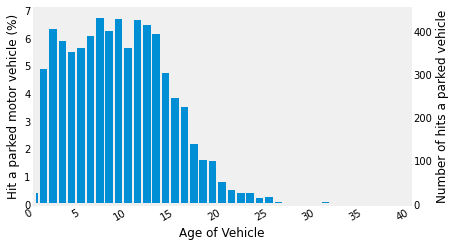

In [ ]:
## Chart 4 - Age of Vehicle in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_df['C_MNTH'].count()
veh_age_count = two_vehic_df.groupby('V_AGE').count().iloc[:, 1]
print(veh_age_count.index)
veh_age_percent = veh_age_count / number_of_data * 100
print(veh_age_percent)
x_data = veh_age_count.index
#print(veh_age_count.V_AGE, veh_age_count)
x_lable = 'Age of Vehicle'
y1_data = veh_age_percent
y2_data = veh_age_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'age_of_veh'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
plt.xlim(0,40)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

P_SEX
0    3493
1    2906
Name: C_WDAY, dtype: int64
P_SEX
0    54.586654
1    45.413346
Name: C_WDAY, dtype: float64


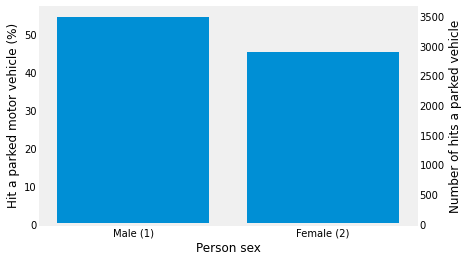

In [ ]:
## Chart 5 - Sex in hit a parked vehicle
number_of_data = two_vehic_df['C_MNTH'].count()
driver_sex_count = two_vehic_df.groupby('P_SEX').count().iloc[:, 1]
driver_sex_percent = driver_sex_count / number_of_data * 100
# x_data = ['Male','Female'] #driver_sex_count.index
x_data = ['Male (1)','Female (2)'] #driver_sex_count.index
print(driver_sex_count)
print(driver_sex_percent)
x_lable = 'Person sex'
y1_data = driver_sex_percent
y2_data = driver_sex_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'Person_sex'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
#fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

6399
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
            86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 99],
           dtype='int64', name='P_AGE')
P_AGE
1     0.922019
2     0.546960
3     0.562588
4     0.406313
5     0.531333
6     0.640725
7     0.625098
8     0.515706
9     0.421941
10    0.500078
11    0.531333
12    0.328176
13    0.343804
14    0.718862
15    0.656353
16    1.687764
17    3.000469
18    3.187998
19    3.281763
20    3.328645
21    2.484763
22    3.484920
23    2.516018
24    2.531646
25    2.156587
26    2.281607
27    2.031567
28    1.844038
29    1.859666
30    1.875293
31    1.703391
32    1.406470
33    1.5627

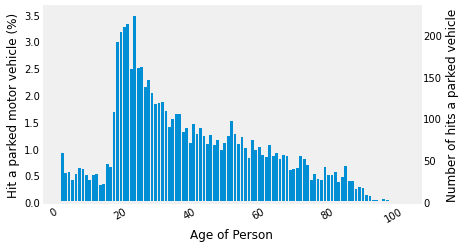

In [ ]:
## Chart 6 - Person age in hit a parked vehicle
number_of_data = two_vehic_df['C_MNTH'].count()
print(number_of_data)
person_age_count = two_vehic_df.groupby('P_AGE').count().iloc[:, 1]
print(person_age_count.index)
person_age_percent = person_age_count / number_of_data * 100
print(person_age_percent.head(40))
x_data = person_age_count.index
#print(veh_age_count.V_AGE, veh_age_count)
x_lable = 'Age of Person'
y1_data = person_age_percent
y2_data = person_age_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'age_of_person'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

4533
Int64Index([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
            30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
            47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
            64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
            81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95],
           dtype='int64', name='P_AGE')
P_AGE
13    0.022060
14    0.132363
15    0.264725
16    1.103022
17    2.691374
18    2.911979
19    2.757556
20    3.375248
21    2.360468
22    3.287006
23    2.603133
24    2.603133
25    2.250165
26    2.426649
27    2.404589
28    2.051621
29    1.941319
30    2.051621
31    1.963380
32    1.433929
33    1.742775
34    1.831017
35    1.875138
36    1.566292
37    1.698654
38    1.235385
39    1.720715
40    1.367748
41    1.632473
42    1.411869
43    1.279506
44    1.411869
45    1.191264
46    1.323627
47    1.103022
48    1.323627
49    1.654533
5

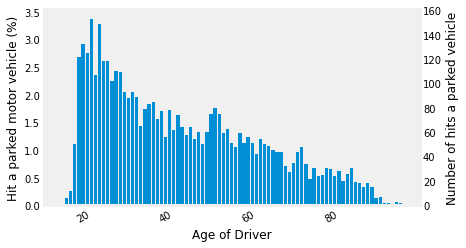

In [ ]:
## Chart 7 - Driver age in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
#print(two_vehic_df[two_vehic_df['P_PSN'] == 11])
number_of_data = two_vehic_df[two_vehic_df['P_PSN'] == 11]['C_MNTH'].count()
print(number_of_data)
driver_age_count = two_vehic_df[two_vehic_df['P_PSN'] == 11].groupby('P_AGE').count().iloc[:, 1]
print(driver_age_count.index)
driver_age_percent = driver_age_count / number_of_data * 100
print(driver_age_percent.head(40))
x_data = driver_age_count.index
#print(veh_age_count.V_AGE, veh_age_count)
x_lable = 'Age of Driver'
y1_data = driver_age_percent
y2_data = driver_age_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'age_of_driver'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 18], dtype='int64', name='C_TRAF')
C_TRAF
1      5.313330
2      0.062510
3      5.766526
4      0.406313
5      0.062510
6      0.031255
7      0.046882
8      0.359431
10     0.031255
11     0.093765
12     0.078137
13     0.015627
17     0.328176
18    87.404282
Name: C_WDAY, dtype: float64


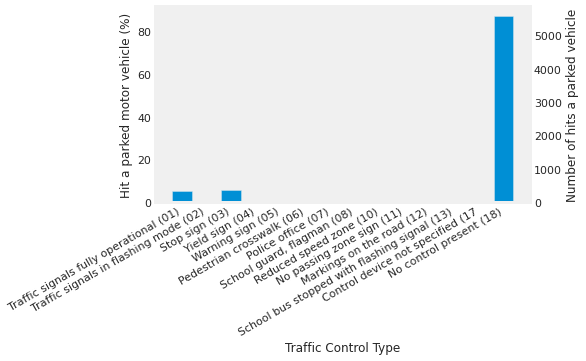

In [ ]:
## Chart 8 - Traffic control type in hit a parked vehicle
number_of_data = two_vehic_df['C_MNTH'].count()
traffic_cont_count = two_vehic_df.groupby('C_TRAF').count().iloc[:, 1]
print(traffic_cont_count.index)
traffic_cont_percent = traffic_cont_count / number_of_data * 100
print(traffic_cont_percent)
# x_data = traffic_cont_count.index
# x_data =['Traffic signals fully operational',																
# 'Traffic signals in flashing mode',																
# 'Stop sign',																
# 'Yield sign',																
# 'Warning sign Yellow diamond shape sign',											
# 'Pedestrian crosswalk',																
# 'Police officer',																
# 'School guard, flagman',																
# 'School crossing',																
# 'Reduced speed zone',																
# 'No passing zone sign',																
# 'Markings on the road e.g. no passing',											
# 'School bus stopped with school bus signal lights flashing',																
# 'Railway crossing with signals, or signals and gates',																
# 'Railway crossing with signs only',																
# 'Control device not specified',																
# 'No control present']
# #
# x_data =['Traffic signals fully operational (01)',																
# 'Traffic signals in flashing mode (02)',																
# 'Stop sign (03)',																
# 'Yield sign (04)',																
# 'Warning sign (05)',											
# 'Pedestrian crosswalk (06)',																
# 'Police office (07)',																
# 'School guard, flagman (08)',																
# 'School crossing (09)',																
# 'Reduced speed zone (10)',																
# 'No passing zone sign (11)',																
# 'Markings on the road (12)',											
# 'School bus stopped with flashing signal (13)',																
# 'Railway crossing with signals, or signals and gates (15)',																
# 'Railway crossing with signs only (16)',																
# 'Control device not specified (17',																
# 'No control present (18)']
# #

x_data =['Traffic signals fully operational (01)',																
'Traffic signals in flashing mode (02)',																
'Stop sign (03)',																
'Yield sign (04)',																
'Warning sign (05)',											
'Pedestrian crosswalk (06)',																
'Police office (07)',																
'School guard, flagman (08)',																															
'Reduced speed zone (10)',																
'No passing zone sign (11)',																
'Markings on the road (12)',											
'School bus stopped with flashing signal (13)',																																
'Control device not specified (17',																
'No control present (18)']
x_lable = 'Traffic Control Type'
y1_data = traffic_cont_percent
y2_data = traffic_cont_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'traffic_cont'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

Int64Index([1, 2, 3, 4, 5, 6, 7], dtype='int64', name='C_WTHR')
C_WTHR
1    74.120956
2    11.345523
3     7.376153
4     4.563213
5     0.765745
6     1.593999
7     0.234412
Name: C_WDAY, dtype: float64


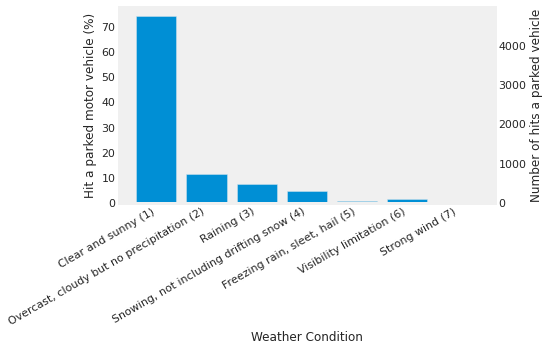

In [ ]:
## Chart 9 - Weather Conditions in hit a parked vehicle
number_of_data = two_vehic_df['C_MNTH'].count()
weather_count = two_vehic_df.groupby('C_WTHR').count().iloc[:, 1]
print(weather_count.index)
weather_percent = weather_count / number_of_data * 100
print(weather_percent)
# x_data = weather_count.index
# x_data =['Clear and sunny',																	
# 'Overcast, cloudy but no precipitation',																	
# 'Raining',																	
# 'Snowing, not including drifting snow',																	
# 'Freezing rain, sleet, hail',																	
# 'Visibility limitation',																	
# 'Strong wind']
x_data =['Clear and sunny (1)',																	
'Overcast, cloudy but no precipitation (2)',																	
'Raining (3)',																	
'Snowing, not including drifting snow (4)',																	
'Freezing rain, sleet, hail (5)',																	
'Visibility limitation (6)',																	
'Strong wind (7)']
x_lable = 'Weather Condition'
y1_data = weather_percent
y2_data = weather_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'weather_cond'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

Int64Index([1, 2, 3, 4, 5, 6, 7], dtype='int64', name='C_RSUR')
C_RSUR
1    71.167370
2    13.767776
3     5.063291
4     1.281450
5     8.501328
6     0.171902
7     0.046882
Name: C_WDAY, dtype: float64


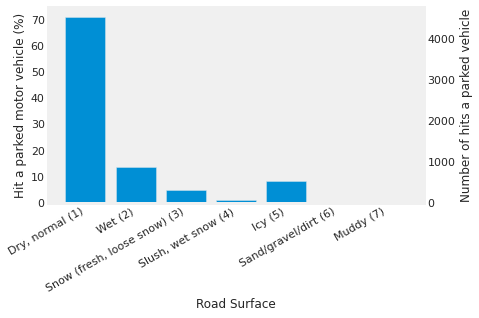

In [ ]:
## Chart 10 - Road surface  Condition in hit a parked vehicle
number_of_data = two_vehic_df['C_MNTH'].count()
road_surf_count = two_vehic_df.groupby('C_RSUR').count().iloc[:, 1]
print(road_surf_count.index)
road_surf_percent = road_surf_count / number_of_data * 100
print(road_surf_percent.head(8))
# x_data = road_surf_count.index
# x_data =['Dry, normal','Wet','Snow (fresh, loose snow)','Slush, wet snow','Icy','Sand/gravel/dirt','Muddy','Oil']
#x_data =['Dry, normal (1)','Wet (2)','Snow (fresh, loose snow) (3)','Slush, wet snow (4)','Icy (5)','Sand/gravel/dirt (6)','Muddy (7)','Oil (8)']
x_data =['Dry, normal (1)','Wet (2)','Snow (fresh, loose snow) (3)','Slush, wet snow (4)','Icy (5)','Sand/gravel/dirt (6)','Muddy (7)']
x_lable = 'Road Surface'
y1_data = road_surf_percent
y2_data = road_surf_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'road_sur_conf'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64', name='C_RALN')
C_RALN
1    82.184716
2     5.407095
3     8.235662
4     1.859666
5     1.422097
6     0.890764
Name: C_WDAY, dtype: float64


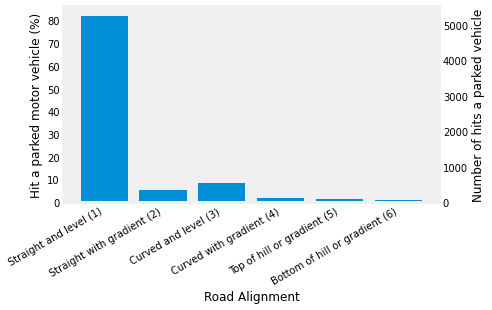

In [ ]:
## Chart 11 - Road alignment in hit a parked vehicle
number_of_data = two_vehic_df['C_MNTH'].count()
road_alig_count = two_vehic_df.groupby('C_RALN').count().iloc[:, 1]
print(road_alig_count.index)
road_alig_percent = road_alig_count / number_of_data * 100
print(road_alig_percent.head(6))
#x_data = road_alig_count.index
x_data =['Straight and level (1)','Straight with gradient (2)','Curved and level (3)','Curved with gradient (4)','Top of hill or gradient (5)','Bottom of hill or gradient (6)']
x_lable = 'Road Alignment'
y1_data = road_alig_percent
y2_data = road_alig_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'road_alignment_cond'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='C_RCFG')
C_RCFG
1    77.074543
2    16.830755
3     5.625879
4     0.015627
5     0.140647
6     0.015627
7     0.031255
8     0.031255
9     0.234412
Name: C_WDAY, dtype: float64


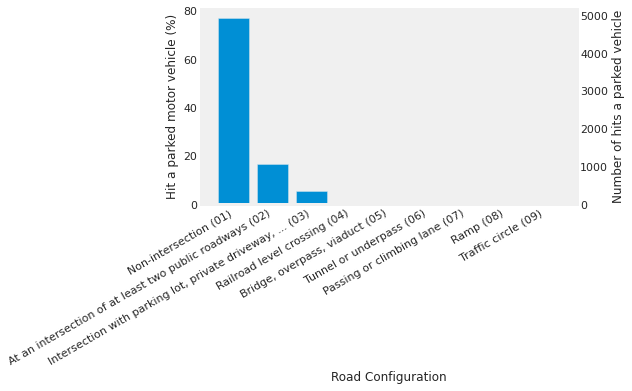

In [ ]:
## Chart 12 - Road configuration in hit a parked vehicle
number_of_data = two_vehic_df['C_MNTH'].count()
road_config_count = two_vehic_df.groupby('C_RCFG').count().iloc[:, 1]
print(road_config_count.index)
road_config_percent = road_config_count / number_of_data * 100
print(road_config_percent.head(10))
#x_data = road_config_count.index
# x_data =['Non-intersection',
# 'At an intersection of at least two public roadways',
# 'Intersection with parking lot, private driveway, ...',
# 'Railroad level crossing',
# 'Bridge, overpass, viaduct',
# 'Tunnel or underpass',
# 'Passing or climbing lane',
# 'Ramp',
# 'Traffic circle',
# 'Express lane of a freeway system']

# x_data =['Non-intersection (01)',
# 'At an intersection of at least two public roadways (02)',
# 'Intersection with parking lot, private driveway, ... (03)',
# 'Railroad level crossing (04)',
# 'Bridge, overpass, viaduct (05)',
# 'Tunnel or underpass (06)',
# 'Passing or climbing lane (07)',
# 'Ramp (08)',
# 'Traffic circle (09)',
# 'Express lane of a freeway system (10)']


x_data =['Non-intersection (01)',
'At an intersection of at least two public roadways (02)',
'Intersection with parking lot, private driveway, ... (03)',
'Railroad level crossing (04)',
'Bridge, overpass, viaduct (05)',
'Tunnel or underpass (06)',
'Passing or climbing lane (07)',
'Ramp (08)',
'Traffic circle (09)']
x_lable = 'Road Configuration'
y1_data = road_config_percent
y2_data = road_config_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'road_config_cond'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

Int64Index([11, 12, 13, 21, 22, 23, 31, 32, 33, 96, 97], dtype='int64', name='P_PSN')
<bound method NDFrame.head of P_PSN
11    70.839194
12     1.156431
13    15.424285
21     4.250664
22     1.437725
23     5.125801
31     0.093765
32     0.968901
33     0.031255
96     0.640725
97     0.031255
Name: C_WDAY, dtype: float64>


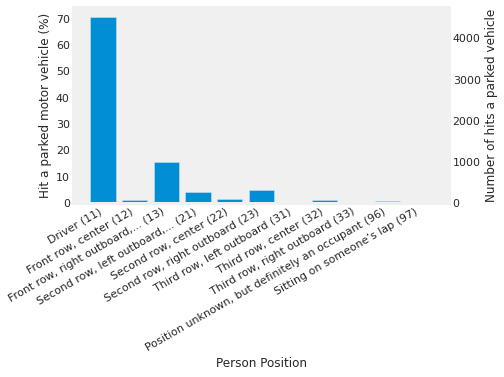

In [ ]:
## Chart 13 - Person Position in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_df['C_MNTH'].count()
person_posi_count = two_vehic_df.groupby('P_PSN').count().iloc[:, 1]
print(person_posi_count.index)
person_posi_percent = person_posi_count / number_of_data * 100
print(person_posi_percent.head)
# x_data = person_posi_count.index
# x_data =['Driver',
# 'Front row, center',
# 'Front row, right outboard,...',
# 'Second row, left outboard,...',
# 'Second row, center',
# 'Second row, right outboard',
# 'Third row, left outboard',
# 'Third row, center',
# 'Third row, right outboard',
# 'Position unknown, but definitely an occupant',
# 'Sitting on someone’s lap',
# 'Outside passenger compartment',
# 'Pedestrian']

# x_data =['Driver (11)',
# 'Front row, center (12)',
# 'Front row, right outboard,... (13)',
# 'Second row, left outboard,... (21)',
# 'Second row, center (22)',
# 'Second row, right outboard (23)',
# 'Third row, left outboard (31)',
# 'Third row, center (32)',
# 'Third row, right outboard (33)',
# 'Position unknown, but definitely an occupant (96)',
# 'Sitting on someone’s lap (97)',
# 'Outside passenger compartment (98)']

x_data =['Driver (11)',
'Front row, center (12)',
'Front row, right outboard,... (13)',
'Second row, left outboard,... (21)',
'Second row, center (22)',
'Second row, right outboard (23)',
'Third row, left outboard (31)',
'Third row, center (32)',
'Third row, right outboard (33)',
'Position unknown, but definitely an occupant (96)',
'Sitting on someone’s lap (97)']
# ,'Pedestrian (99)']
x_lable = 'Person Position'
y1_data = person_posi_percent
y2_data = person_posi_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'person_pos_cond'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

Int64Index([1, 2, 9, 12, 13], dtype='int64', name='P_SAFE')
<bound method NDFrame.head of P_SAFE
1      7.969995
2     84.997656
9      1.859666
12     3.422410
13     1.750273
Name: C_WDAY, dtype: float64>


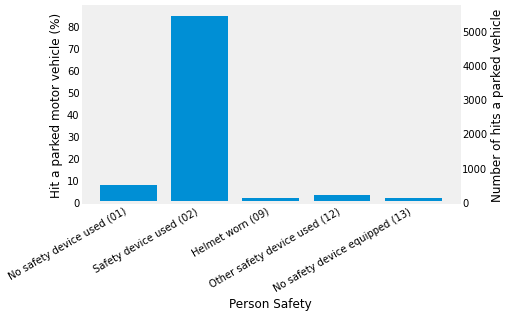

In [ ]:
## Chart 14 - Person Position in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_df['C_MNTH'].count()
person_safe_count = two_vehic_df.groupby('P_SAFE').count().iloc[:, 1]
print(person_safe_count.index)
person_safe_percent = person_safe_count / number_of_data * 100
print(person_safe_percent.head)
# x_data = person_safe_count.index
# x_data =['No safety device used',
# 'Safety device used',
# 'Helmet worn',
# 'Other safety device used',
# 'No safety device equipped']
x_data =['No safety device used (01)',
'Safety device used (02)',
'Helmet worn (09)',
'Other safety device used (12)',
'No safety device equipped (13)']
x_lable = 'Person Safety'
y1_data = person_safe_percent
y2_data = person_safe_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'person_safe_cond'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

Int64Index([1, 2, 3], dtype='int64', name='P_ISEV')
P_ISEV
1    1654
2    4721
3      24
Name: C_WDAY, dtype: int64
P_ISEV
1    25.847789
2    73.777153
3     0.375059
Name: C_WDAY, dtype: float64


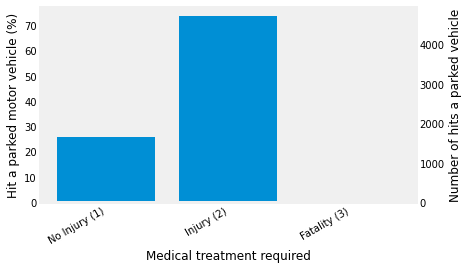

In [ ]:
## Chart 15 - Severity in hit a parked vehicle
number_of_data = two_vehic_df['C_MNTH'].count()
severity_count = two_vehic_df.groupby('P_ISEV').count().iloc[:, 1]
print(severity_count.index)
severity_percent = severity_count / number_of_data * 100
print(severity_count.head(3))
print(severity_percent.head(3))
# x_data = severity_count.index
# x_data =['No Injury',																	
# 'Injury',																	
# 'Fatality']
x_data =['No Injury (1)',																	
'Injury (2)',																	
'Fatality (3)']
x_lable = 'Medical treatment required'
y1_data = severity_percent
y2_data = severity_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'severity_cond'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

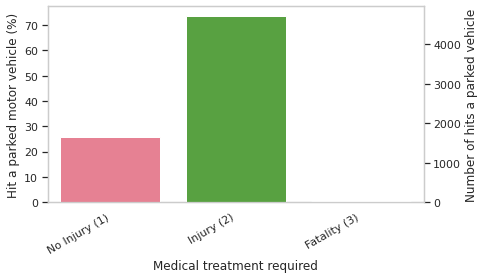

In [ ]:
import seaborn as sns  # for plot
sns.set(style="whitegrid")
sns.set_palette("husl",3)
fig, ax1 = plt.subplots()
fig.autofmt_xdate()
plt.xlabel(x_lable)
sns.barplot(x=x_data, y=y1_data)
plt.grid(False)
plt.ylabel(y1_lable)
ax2 = plt.twinx()
sns.barplot(x=x_data, y=y2_data, ax=ax2)
plt.grid(False)
plt.ylabel(y2_lable)
# plt.show() 
plt.savefig((filename+'1.svg'), format='svg', dpi=300, transparent=True)

In [ ]:
plt.style.use('fivethirtyeight')
%matplotlib inline

### **4-2- For All Data**

> This part has been generated for better presentatiom of outputs. <br>

3817613


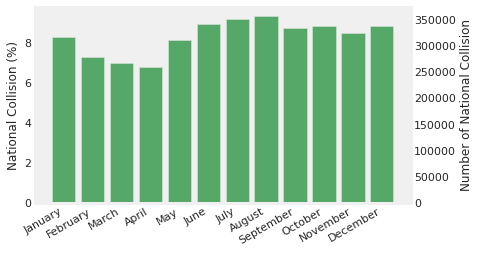

In [ ]:
## Chart 1 - different months
number_of_data = cleaned_df['C_MNTH'].count()
print(number_of_data)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
months_count = cleaned_df.groupby('C_MNTH').count().iloc[:, 1]
months_percent = months_count / number_of_data * 100
x_data = months
y1_data = months_percent
y2_data = months_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'monthely'
#------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()         # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show()
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
#-------------------------------------------------------------------------------------

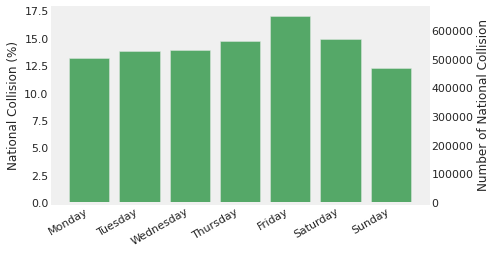

In [ ]:
## Chart 2 - different day of week
number_of_data = cleaned_df['C_MNTH'].count()
week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
week_day_count = cleaned_df.groupby('C_WDAY').count().iloc[:, 1]
week_day_percent = week_day_count / number_of_data * 100
x_data = week_day
y1_data = week_day_percent
y2_data = week_day_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'week_day'
#------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
#-------------------------------------------------------------------------------------

C_HOUR
0    53695
1    43734
Name: C_MNTH, dtype: int64


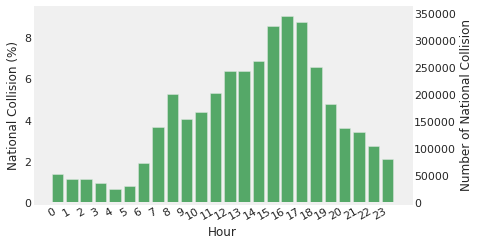

In [ ]:
## Chart 3 - different times of a day
number_of_data = cleaned_df['C_MNTH'].count()
hour = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
hour_count = cleaned_df.groupby('C_HOUR').count().iloc[:, 1]
print(hour_count.head(2))
hour_percent = hour_count / number_of_data * 100
x_data = hour
x_lable = 'Hour'
y1_data = hour_percent
y2_data = hour_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'times_of_a_day'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

Int64Index([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
            ...
             93,  94,  95,  96,  97,  99, 100, 101, 102, 104],
           dtype='int64', name='V_AGE', length=104)
V_AGE
-1    0.000864
 0    0.563389
Name: C_MNTH, dtype: float64


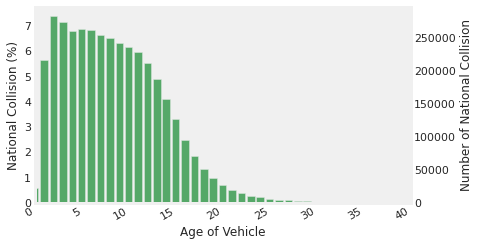

In [ ]:
## Chart 4 - Age of Vehicle 
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = cleaned_df['C_MNTH'].count()
veh_age_count = cleaned_df.groupby('V_AGE').count().iloc[:, 1]
print(veh_age_count.index)
veh_age_percent = veh_age_count / number_of_data * 100
print(veh_age_percent.head(2))
x_data = veh_age_count.index
x_lable = 'Age of Vehicle'
y1_data = veh_age_percent
y2_data = veh_age_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'age_of_veh'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
plt.xlim(0,40)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

P_SEX
0    2052783
1    1764830
Name: C_MNTH, dtype: int64


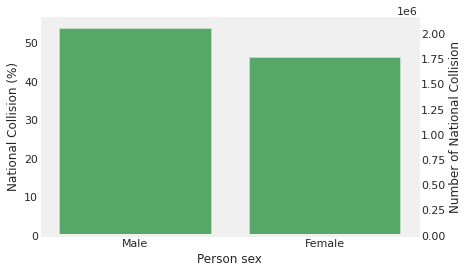

In [ ]:
## Chart 5 - Sex
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = cleaned_df['C_MNTH'].count()
driver_sex_count = cleaned_df.groupby('P_SEX').count().iloc[:, 1]
driver_sex_percent = driver_sex_count / number_of_data * 100

x_data = ['Male','Female'] #driver_sex_count.index
print(driver_sex_count)
x_lable = 'Person sex'
y1_data = driver_sex_percent
y2_data = driver_sex_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'Person_sex'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g') #color='rgbkymc'
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

3817613
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
            86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64', name='P_AGE')
P_AGE
1    0.903758
2    0.547174
Name: C_MNTH, dtype: float64


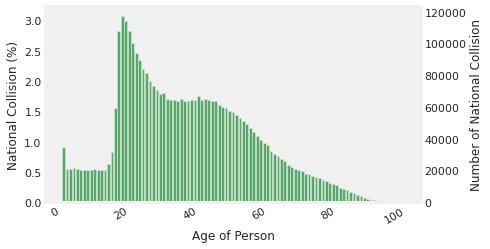

In [ ]:
## Chart 6 - Person age 
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = cleaned_df['C_MNTH'].count()
print(number_of_data)
person_age_count = cleaned_df.groupby('P_AGE').count().iloc[:, 1]
print(person_age_count.index)
person_age_percent = person_age_count / number_of_data * 100
print(person_age_percent.head(2))
x_data = person_age_count.index
#print(veh_age_count.V_AGE, veh_age_count)
x_lable = 'Age of Person'
y1_data = person_age_percent
y2_data = person_age_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'age_of_person'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

2584453
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
            86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64', name='P_AGE')
P_AGE
1     0.002205
2     0.000542
3     0.000310
4     0.000542
5     0.001122
        ...   
95    0.003869
96    0.002283
97    0.000967
98    0.000851
99    0.001238
Name: C_MNTH, Length: 99, dtype: float64


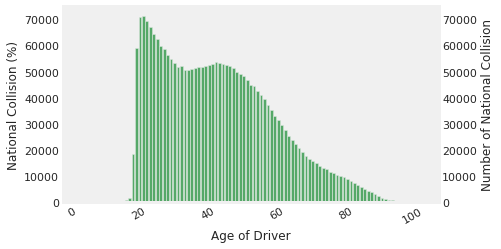

In [ ]:
## Chart 7 - Driver age
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = cleaned_df[cleaned_df['P_PSN'] == '11']['C_MNTH'].count()
print(number_of_data)
driver_age_count = cleaned_df[cleaned_df['P_PSN'] == '11'].groupby('P_AGE').count().iloc[:, 1]
print(driver_age_count.index)
driver_age_percent = driver_age_count / number_of_data * 100
print(driver_age_percent)
x_data = driver_age_count.index
#print(veh_age_count.V_AGE, veh_age_count)
x_lable = 'Age of Driver'
y1_data = driver_age_percent
y2_data = driver_age_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'age_of_driver'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y2_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)

CategoricalIndex(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
                  '11', '12', '13', '15', '16', '17', '18'],
                 categories=['01', '02', '03', '04', '05', '06', '07', '08', ...], ordered=False, name='C_TRAF', dtype='category')
C_TRAF
01    31.016554
02     0.369105
Name: C_MNTH, dtype: float64


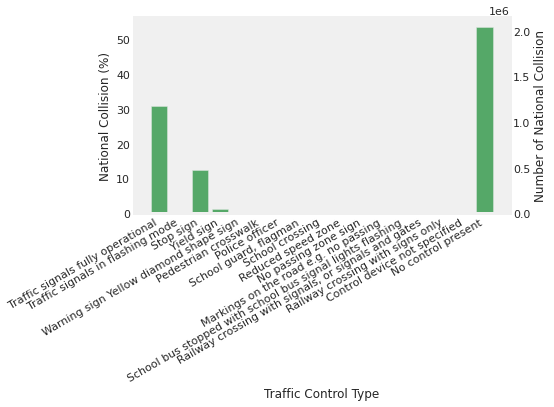

In [ ]:
## Chart 8 - Traffic control type 
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = cleaned_df['C_MNTH'].count()
traffic_cont_count = cleaned_df.groupby('C_TRAF').count().iloc[:, 1]
print(traffic_cont_count.index)
traffic_cont_percent = traffic_cont_count / number_of_data * 100
print(traffic_cont_percent.head(2))
# x_data = traffic_cont_count.index
x_data =['Traffic signals fully operational',																
'Traffic signals in flashing mode',																
'Stop sign',																
'Yield sign',																
'Warning sign Yellow diamond shape sign',											
'Pedestrian crosswalk',																
'Police officer',																
'School guard, flagman',																
'School crossing',																
'Reduced speed zone',																
'No passing zone sign',																
'Markings on the road e.g. no passing',											
'School bus stopped with school bus signal lights flashing',																
'Railway crossing with signals, or signals and gates',																
'Railway crossing with signs only',																
'Control device not specified',																
'No control present']
x_lable = 'Traffic Control Type'
y1_data = traffic_cont_percent
y2_data = traffic_cont_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'traffic_cont'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

CategoricalIndex(['1', '2', '3', '4', '5', '6', '7'], categories=['1', '2', '3', '4', '5', '6', '7'], ordered=False, name='C_WTHR', dtype='category')
C_WTHR
1    71.534281
2     9.255731
Name: C_MNTH, dtype: float64


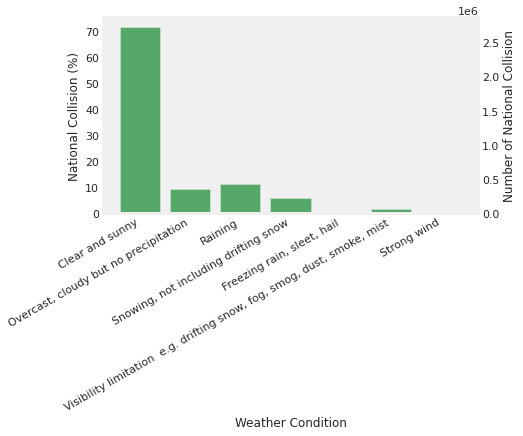

In [ ]:
## Chart 9 - Weather Condition
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = cleaned_df['C_MNTH'].count()
weather_count = cleaned_df.groupby('C_WTHR').count().iloc[:, 1]
print(weather_count.index)
weather_percent = weather_count / number_of_data * 100
print(weather_percent.head(2))
# x_data = weather_count.index
x_data =['Clear and sunny',																	
'Overcast, cloudy but no precipitation',																	
'Raining',																	
'Snowing, not including drifting snow',																	
'Freezing rain, sleet, hail',																	
'Visibility limitation  e.g. drifting snow, fog, smog, dust, smoke, mist',																	
'Strong wind',]
x_lable = 'Weather Condition'
y1_data = weather_percent
y2_data = weather_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'weather_cond'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)

CategoricalIndex(['1', '2', '3'], categories=['1', '2', '3'], ordered=False, name='P_ISEV', dtype='category')
P_ISEV
1    1641640
2    2151965
3      24008
Name: C_MNTH, dtype: int64
P_ISEV
1    43.001740
2    56.369386
3     0.628875
Name: C_MNTH, dtype: float64


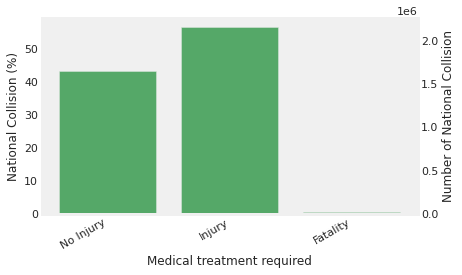

3817613


In [ ]:
## Chart 10 - Severity
number_of_data = cleaned_df['C_MNTH'].count()
severity_count_all = cleaned_df.groupby('P_ISEV').count().iloc[:, 1]
print(severity_count_all.index)
severity_percent_all = severity_count_all / number_of_data * 100
print(severity_count_all.head(3))
print(severity_percent_all.head(3))
# x_data = severity_count_all.index
x_data =['No Injury',																	
'Injury',																	
'Fatality']
x_lable = 'Medical treatment required'
y1_data = severity_percent_all
y2_data = severity_count_all
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'severity_cond'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
print(number_of_data)

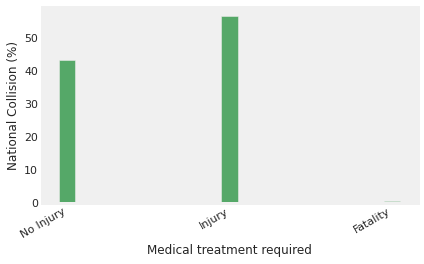

In [ ]:
## Chart 10 - Severity compare
barWidth = 0.25

# x_data = severity_count.index
x_data =['No Injury',																	
'Injury',																	
'Fatality']
x_lable = 'Medical treatment required'
y1_data = severity_percent_all
y2_data = severity_percent
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'severity_cond_compare'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g', width = 0.1, label='National Collision')
ax2.bar(x_data, y2_data,color='b', width = 0.1, label='Hit a parked motor vehicle')
plt.grid(False)
# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
# ax2.bar(x_data, y2_data,color='b')
# plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)

CategoricalIndex(['01', '02', '03', '04', '05', '06', '21', '22', '23', '24',
                  '25', '31', '32', '33', '34', '35', '36', '41'],
                 categories=['01', '02', '03', '04', '05', '06', '21', '22', ...], ordered=False, name='C_CONF', dtype='category')
C_CONF
01     0.923299
02     2.214106
03     2.638429
04     3.483931
05     0.226581
06     8.960704
21    34.795119
22     4.047084
23     1.033106
24     0.767783
25     0.154363
31     3.777177
32     0.677753
33     7.676236
34     1.096051
35    16.146084
36    10.589680
41     0.792511
Name: C_MNTH, dtype: float64


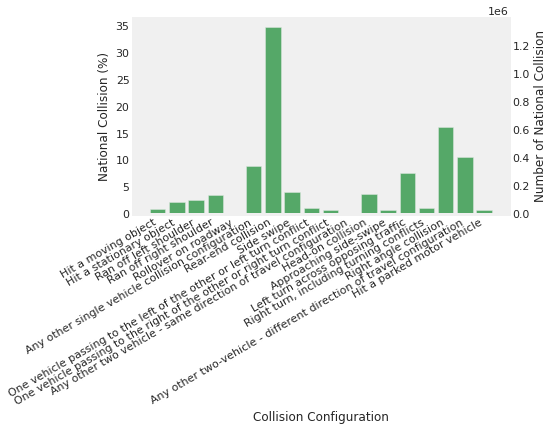

In [ ]:
## Chart 10 - Collision Configuration 
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = cleaned_df['C_MNTH'].count()
collision_conf_count = cleaned_df.groupby('C_CONF').count().iloc[:, 1]
print(collision_conf_count.index)
collision_conf_percent = collision_conf_count / number_of_data * 100
print(collision_conf_percent)
# x_data = collision_conf_count.index
x_data =['Hit a moving object',
'Hit a stationary object',
'Ran off left shoulder',
'Ran off right shoulder',
'Rollover on roadway',
'Any other single vehicle collision configuration',
'Rear-end collision',
'Side swipe',
'One vehicle passing to the left of the other or left turn conflict',
'One vehicle passing to the right of the other or right turn conflict',
'Any other two vehicle - same direction of travel configuration',
'Head-on collision',
'Approaching side-swipe',
'Left turn across opposing traffic',
'Right turn, including turning conflicts',
'Right angle collision',
'Any other two-vehicle - different direction of travel configuration',
'Hit a parked motor vehicle']
x_lable = 'Collision Configuration'
y1_data = collision_conf_percent
y2_data = collision_conf_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'collision_configuration'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

In [ ]:
# collision_conf_count = cleaned_df.groupby('C_CONF').count().iloc[:, 1]
# print(collision_conf_count[collision_conf_count].sum())
# print('Number of data before 2017:   ',sum(df['C_YEAR'] < 2017))
print(collision_conf_percent[11])
print(collision_conf_percent[0:6].sum().round(1))
print(collision_conf_percent[6:11].sum().round(1))
print(collision_conf_percent[11:17].sum().round(1))
print(collision_conf_percent[17].round(1))
collision_conf_percent[0:17].round(1)

3.7771769951537784
18.4
40.8
40.0
0.8


C_CONF
01     0.9
02     2.2
03     2.6
04     3.5
05     0.2
06     9.0
21    34.8
22     4.0
23     1.0
24     0.8
25     0.2
31     3.8
32     0.7
33     7.7
34     1.1
35    16.1
36    10.6
Name: C_MNTH, dtype: float64

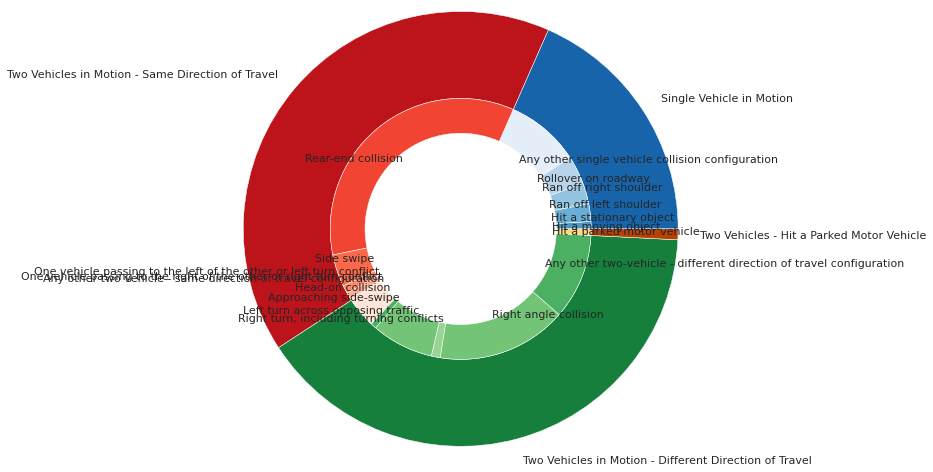

<Figure size 432x288 with 0 Axes>

In [ ]:
# Libraries
import matplotlib.pyplot as plt
 
# Make data: I have 4 groups and 18 subgroups
group_names=['Single Vehicle in Motion', 'Two Vehicles in Motion - Same Direction of Travel', 'Two Vehicles in Motion - Different Direction of Travel','Two Vehicles - Hit a Parked Motor Vehicle']
group_size=[collision_conf_percent[0:6].sum().round(1),collision_conf_percent[6:11].sum().round(1),collision_conf_percent[11:17].sum().round(1),collision_conf_percent[17].sum().round(1)]
subgroup_names=['Hit a moving object',
'Hit a stationary object',
'Ran off left shoulder',
'Ran off right shoulder',
'Rollover on roadway',
'Any other single vehicle collision configuration',
'Rear-end collision',
'Side swipe',
'One vehicle passing to the left of the other or left turn conflict',
'One vehicle passing to the right of the other or right turn conflict',
'Any other two vehicle - same direction of travel configuration',
'Head-on collision',
'Approaching side-swipe',
'Left turn across opposing traffic',
'Right turn, including turning conflicts',
'Right angle collision',
'Any other two-vehicle - different direction of travel configuration',
'Hit a parked motor vehicle']
subgroup_size=[collision_conf_percent[0:18].round(1)]

# Create colors
a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.YlOrBr]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.5, labels=group_names, colors=[a(0.8), b(0.8), c(0.8), d(0.8)] )
plt.setp( mypie, width=1.0, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=2.5-1.0, labels=subgroup_names, labeldistance=0.7 , colors=[a(0.6), a(0.5), a(0.4), a(0.3), a(0.2), a(0.1), b(0.6), b(0.5), b(0.4), b(0.3),b(0.2), b(0.1), c(0.6), c(0.5), c(0.4), c(0.5), c(0.6), d(0.3), b(0.2), c(0.1), c(0.05), d(0.5)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# # show it
plt.show()
plt.savefig(('Pie_alldata.svg'), format='svg', dpi=300)


### **4-3- Other Presentoins**

> This part has been generated for better presentatiom of outputs. <br>

In [ ]:
ct= pd.crosstab(two_vehic_df.P_SEX,two_vehic_df.P_ISEV, margins=True)
ct.to_excel('ct_sex_sev.xlsx')
ct

P_ISEV,1,2,3,All
P_SEX,,,,
0,992,2481,20,3493
1,662,2240,4,2906
All,1654,4721,24,6399


In [ ]:
grouped_p_severity = two_vehic_df.groupby('P_ISEV').count().reset_index().iloc[:,[0,1]]
print(grouped_p_severity)
grouped_p_severity.to_excel('G_Sev.xlsx')

   P_ISEV  C_MNTH
0       1    1654
1       2    4721
2       3      24


In [ ]:
table = pd.pivot_table(two_vehic_df, values=['V_AGE', 'P_AGE'], index=['C_WDAY', 'P_SEX'],
                       aggfunc={'V_AGE': [min, max, np.mean],'P_AGE': [min, max, np.mean]})
table.to_excel('pivot_table.xlsx')
table

P_AGE                 V_AGE                
               max       mean  min   max       mean  min
C_WDAY P_SEX                                            
1      0      90.0  40.359914  1.0  31.0   9.073276  0.0
       1      92.0  38.205729  1.0  46.0   8.718750  0.0
2      0      95.0  39.910314  1.0  25.0   9.365471  1.0
       1      91.0  40.815000  1.0  30.0   9.172500  0.0
3      0      95.0  40.117521  1.0  40.0   9.506410  0.0
       1      91.0  38.483117  1.0  40.0   8.950649  0.0
4      0      92.0  39.061758  1.0  26.0   9.482185  0.0
       1      94.0  38.221607  1.0  27.0   9.077562  1.0
5      0      99.0  36.744027  1.0  43.0   9.143345  0.0
       1      90.0  37.718750  1.0  27.0   8.593750  1.0
6      0      94.0  35.708703  1.0  34.0  10.078153  0.0
       1      93.0  36.624729  1.0  25.0   9.173536  0.0
7      0      88.0  35.308257  1.0  52.0   9.139450  0.0
       1      95.0  35.172414  1.0  52.0   8.560920  0.0

In [ ]:
two_vehic_df.groupby('C_WDAY').count().iloc[:, 5]

C_WDAY
1     848
2     846
3     853
4     782
5    1066
6    1024
7     980
Name: C_RSUR, dtype: int64

## **5- Feature Importance for Controlable or Pridictable Data _(Can be Used to Inhance Radar Alarm Accuray_**

### **5-1- Dropping Uncontrolable or unpredictable Columns**
 
> In _`['C_RSUR',	'V_TYPE',	'P_SEX',	'P_AGE',	'P_PSN',	'P_USER',	'V_AGE']`_ columns there are no information that we can predict or control. Therefore, we drop them.

In [ ]:
un_cols=['C_RSUR','C_VEHS', 'V_TYPE',	'P_SEX',	'P_AGE',	'P_PSN',	'P_USER',	'V_AGE']
two_vehic_df_con = two_vehic_df.drop(un_cols, axis=1)
two_vehic_df_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6399 entries, 5246480 to 6772040
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   C_MNTH  6399 non-null   int64
 1   C_WDAY  6399 non-null   int64
 2   C_HOUR  6399 non-null   int64
 3   C_RCFG  6399 non-null   int64
 4   C_WTHR  6399 non-null   int64
 5   C_RALN  6399 non-null   int64
 6   C_TRAF  6399 non-null   int64
 7   P_ISEV  6399 non-null   int64
 8   P_SAFE  6399 non-null   int64
dtypes: int64(9)
memory usage: 819.9 KB


### **5-2- Create dummy variables based on all variable**

In [ ]:
cat_cols =[]
two_vehic_df_con_cat = pd.get_dummies(two_vehic_df_con, columns=cat_cols, drop_first=True)
two_vehic_df_con_cat.head(2)

,C_MNTH,C_WDAY,C_HOUR,C_RCFG,C_WTHR,C_RALN,C_TRAF,P_ISEV,P_SAFE
5246480,1,1,13,1,1,1,18,2,2
5246511,1,1,6,1,1,1,18,2,2


### **5-3- Balancing the Dataset**
https://elitedatascience.com/imbalanced-classes

> Downsample majority class

In [ ]:
two_vehic_df_con_cat_majority = two_vehic_df_con_cat[two_vehic_df_con_cat.P_ISEV==2]
two_vehic_df_con_cat_minority = two_vehic_df_con_cat[two_vehic_df_con_cat.P_ISEV==1]
print(two_vehic_df_con_cat_majority.shape[0])
print(two_vehic_df_con_cat_minority.shape[0])

from sklearn.utils import resample
# Downsample majority class
two_vehic_df_con_cat_majority_downsampled = resample(two_vehic_df_con_cat_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=two_vehic_df_cat_minority.shape[0],     # to match minority class
                                 random_state=123) # reproducible results
two_vehic_df_con_cat_majority_downsampled.shape[0]

# Combine minority class with downsampled majority class
df_con_downsampled = pd.concat([two_vehic_df_con_cat_majority_downsampled, two_vehic_df_con_cat_minority])
df_con_downsampled.P_ISEV.value_counts()

4721
1654


1    1654
2    1654
Name: P_ISEV, dtype: int64

### **5-4- Partition into train and test**
Use train_test_split from sklearn.model_selection to partition the dataset into 70% for training and 30% for testing.

You can use the 70% for training set as both training and validation by using cross-validation.

**Train and Test the model**  
P_ISEV:<br>

|Code| Description|
|---------|-----------|
|1|No Injury|
|2|Injury|
|3|Fatality	Died immediately or within the time limit.

In [ ]:
target = 'P_ISEV' # Collision producing at least one injury
features = list(df_con_downsampled.columns)
features = [f for f in features if f!=target]
# Separate input features (X) and target variable (y)
X = df_con_downsampled[features]
y = df_con_downsampled[[target]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print(features)
print(X_train.shape)
print(y_train.shape) 
print(X_test.shape) 
print(y_test.shape)
# Make target variable in numpy array format of 0 or 1
y_train_b = 1*np.ravel(y_train)
y_test_b = 1*np.ravel(y_test)
y_train_b

print(X)

['C_MNTH', 'C_WDAY', 'C_HOUR', 'C_RCFG', 'C_WTHR', 'C_RALN', 'C_TRAF', 'P_SAFE']
(2315, 8)
(2315, 1)
(993, 8)
(993, 1)
         C_MNTH  C_WDAY  C_HOUR  C_RCFG  C_WTHR  C_RALN  C_TRAF  P_SAFE
6185055       1       3      14       1       1       1      18       2
5732505       8       2       9       2       1       1      18       2
6140775      11       5      12       1       1       1      18       2
6649488       8       3       2       2       1       1      18       2
6192080       1       5      19       1       1       1      18       2
...         ...     ...     ...     ...     ...     ...     ...     ...
6767405      12       6       1       1       1       1       8       2
6769574      12       7      18       1       2       1      18       2
6771011      12       7      23       1       1       1      18       2
6771012      12       7      23       1       1       1      18       2
6772038      12       7      14       1       1       1      18       2

[3308 rows x 8 c

### **5-5- Scaling Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# For all datapoints
min_max_scaler_all = MinMaxScaler()
#---------------------------------|
X_minmax = min_max_scaler_all.fit_transform(X)
X_scaled = pd.DataFrame(X_minmax, columns = X.columns)
#---------------------------------
print(min_max_scaler_all.scale_)
#---------------------------------|
print(X_scaled.shape)
#---------------------------------
# Just based on the training set
min_max_scaler = MinMaxScaler()
#---------------------------------|
X_train_minmax = min_max_scaler.fit_transform(X_train)
print(min_max_scaler.scale_)
X_tr_scaled = pd.DataFrame(X_train_minmax, columns = X_train.columns)

print(X_tr_scaled.shape)

X_test_minmax = min_max_scaler.transform(X_test)
X_te_scaled = pd.DataFrame(X_test_minmax, columns = X_test.columns)
#---------------------------------

[0.09090909 0.16666667 0.04347826 0.125      0.16666667 0.2
 0.05882353 0.08333333]
(3308, 8)
[0.09090909 0.16666667 0.04347826 0.125      0.16666667 0.2
 0.05882353 0.08333333]
(2315, 8)


### **5-6 Feature Importance**

C_HOUR: 0.322
C_MNTH: 0.222
C_WDAY: 0.171
C_WTHR: 0.0731
P_SAFE: 0.0613
C_RALN: 0.0595
C_RCFG: 0.0524
C_TRAF: 0.0377


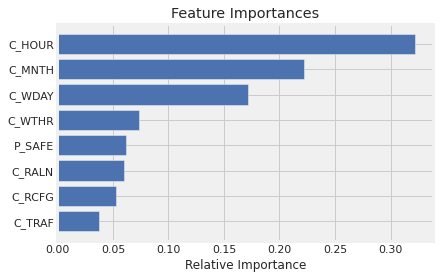

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
#---------------------------------|
rnd_clf.fit( X,y)
features = X.columns
#---------------------------------
feature_importance = {}
#---------------------------------|
for name, importance in zip(X.columns, rnd_clf.feature_importances_):
#---------------------------------
  feature_importance[name] = importance
  
feature_importance = [(k, feature_importance[k]) for k in sorted(feature_importance, key=feature_importance.get, reverse=True)]
for k, v in feature_importance:
  print(f"{k}: {v:.3}")

importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



## 6- Fatality



In [ ]:
print('-------------------------------------------------------------------------')
two_vehic_fatality = two_vehic_df[two_vehic_df.P_ISEV == '3']
print('The number of rows for "two_vehic_fatality" DataFrame is ', two_vehic_fatality['C_MNTH'].count())
print('-------------------------------------------------------------------------')
two_vehic_fatality.info()

-------------------------------------------------------------------------
The number of rows for "two_vehic_fatality" DataFrame is  0
-------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   C_MNTH  0 non-null      int64
 1   C_WDAY  0 non-null      int64
 2   C_HOUR  0 non-null      int64
 3   C_VEHS  0 non-null      int64
 4   C_RCFG  0 non-null      int64
 5   C_WTHR  0 non-null      int64
 6   C_RSUR  0 non-null      int64
 7   C_RALN  0 non-null      int64
 8   C_TRAF  0 non-null      int64
 9   V_TYPE  0 non-null      int64
 10  P_SEX   0 non-null      int64
 11  P_AGE   0 non-null      int64
 12  P_PSN   0 non-null      int64
 13  P_ISEV  0 non-null      int64
 14  P_SAFE  0 non-null      int64
 15  P_USER  0 non-null      int64
 16  V_AGE   0 non-null      int64
dtypes: int64(17)
memory usage: 0.

In [ ]:
## Chart 1 - Hit a parked vehicle variation in different months
number_of_data = two_vehic_fatality['C_MNTH'].count()
print(number_of_data)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
months_count = two_vehic_fatality.groupby('C_MNTH').count().iloc[:, 1]
months_percent = months_count / number_of_data * 100
x_data = months
y1_data = months_percent
y2_data = months_count
title = 'Fatality'
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'monthely_fatality'
#------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()         # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show()
fig.savefig((filename+'.svg'), format='svg', dpi=300)

0


In [ ]:
## Chart 2 - Hit a parked vehicle variation in different day of week
number_of_data = two_vehic_fatality['C_MNTH'].count()
print(number_of_data)
week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
week_day_count = two_vehic_fatality.groupby('C_WDAY').count().iloc[:, 1]
week_day_percent = week_day_count / number_of_data * 100
x_data = week_day
y1_data = week_day_percent
y2_data = week_day_count
title = 'Fatality'
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'weekday_fatality'
#------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
#-------------------------------------------------------------------------------------
# print(week_day_count , week_day_count.sum())

0


In [ ]:
## Chart 3 - Hit a parked vehicle variation in different times of a day
number_of_data = two_vehic_fatality['C_MNTH'].count()
print(number_of_data)
hour = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
hour_count = two_vehic_fatality.groupby('C_HOUR').count().iloc[:, 1]
print(hour_count.head(2))
hour_percent = hour_count / number_of_data * 100
x_data = hour
title = 'Fatality'
x_lable = 'Hour'
y1_data = hour_percent
y2_data = hour_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'times_of_a_day_fatality'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

0


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 24, 28, 29],
           dtype='int64', name='V_AGE')
V_AGE
0    0.450450
1    4.954955
Name: C_WDAY, dtype: float64


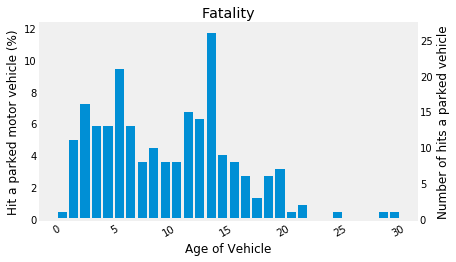

In [ ]:
## Chart 4 - Age of Vehicle in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_fatality['C_MNTH'].count()
print(number_of_data)
veh_age_count = two_vehic_fatality.groupby('V_AGE').count().iloc[:, 1]
print(veh_age_count.index)
veh_age_percent = veh_age_count / number_of_data * 100
print(veh_age_percent.head(2))
x_data = veh_age_count.index
title = 'Fatality'
x_lable = 'Age of Vehicle'
y1_data = veh_age_percent
y2_data = veh_age_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'age_of_veh_fatality'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

P_SEX
0    172
1     50
Name: C_WDAY, dtype: int64


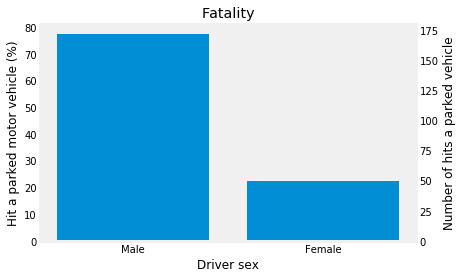

In [ ]:
## Chart 5 - Sex in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_fatality['C_MNTH'].count()
driver_sex_count = two_vehic_fatality.groupby('P_SEX').count().iloc[:, 1]
driver_sex_percent = driver_sex_count / number_of_data * 100

x_data = ['Male','Female'] #driver_sex_count.index
print(driver_sex_count)
title = 'Fatality'
x_lable = 'Driver sex'
y1_data = driver_sex_percent
y2_data = driver_sex_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'driver_sex_fatality'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
#fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

Int64Index([ 4,  5, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
            31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 64, 65, 67, 68, 69, 70,
            71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 87, 89, 90, 91,
            94],
           dtype='int64', name='P_AGE')
P_AGE
4    0.45045
5    0.45045
Name: C_WDAY, dtype: float64


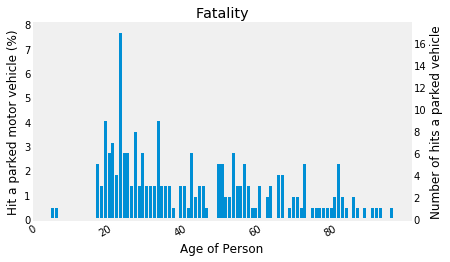

In [ ]:
## Chart 6 - Person age in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_fatality['C_MNTH'].count()
person_age_count = two_vehic_fatality.groupby('P_AGE').count().iloc[:, 1]
print(person_age_count.index)
person_age_percent = person_age_count / number_of_data * 100
print(person_age_percent.head(2))
x_data = person_age_count.index
title = 'Fatality'
x_lable = 'Age of Person'
y1_data = person_age_percent
y2_data = person_age_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'age_of_person_fatality'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

164
Int64Index([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
            33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 48, 49, 50, 51, 52, 53,
            54, 55, 56, 57, 59, 61, 62, 64, 65, 67, 68, 69, 70, 71, 73, 74, 75,
            76, 77, 78, 79, 80, 82, 84, 85, 87, 89, 90, 94],
           dtype='int64', name='P_AGE')
P_AGE
16    1.219512
17    1.829268
18    2.439024
19    2.439024
20    2.439024
21    1.829268
22    7.317073
23    3.048780
24    2.439024
25    1.219512
Name: C_WDAY, dtype: float64


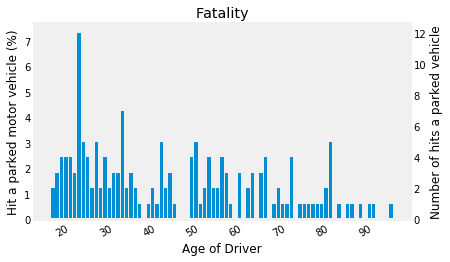

In [ ]:
## Chart 7 - Driver age in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_fatality[two_vehic_fatality['P_PSN'] == '11']['C_MNTH'].count()
print(number_of_data)
driver_age_count = two_vehic_fatality[two_vehic_fatality['P_PSN'] == '11'].groupby('P_AGE').count().iloc[:, 1]
print(driver_age_count.index)
driver_age_percent = driver_age_count / number_of_data * 100
print(driver_age_percent.head(10))
x_data = driver_age_count.index
title = 'Fatality'
x_lable = 'Age of Driver'
y1_data = driver_age_percent
y2_data = driver_age_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'age_of_driver_fatality'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

CategoricalIndex(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
                  '11', '12', '13', '15', '16', '17', '18'],
                 categories=['01', '02', '03', '04', '05', '06', '07', '08', ...], ordered=False, name='C_TRAF', dtype='category')
C_TRAF
01    4.954955
02    0.450450
Name: C_WDAY, dtype: float64


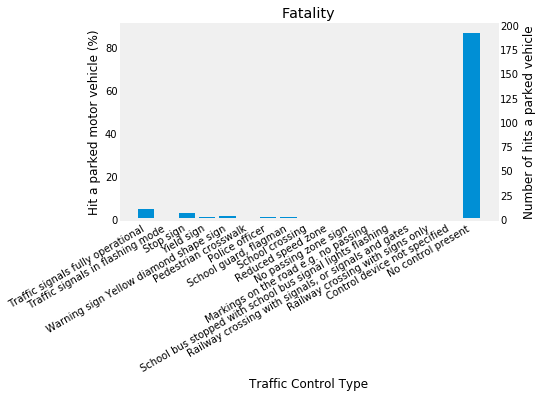

In [ ]:
## Chart 8 - Traffic control type in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_fatality['C_MNTH'].count()
traffic_cont_count = two_vehic_fatality.groupby('C_TRAF').count().iloc[:, 1]
print(traffic_cont_count.index)
traffic_cont_percent = traffic_cont_count / number_of_data * 100
print(traffic_cont_percent.head(2))
# x_data = traffic_cont_count.index
x_data =['Traffic signals fully operational',																
'Traffic signals in flashing mode',																
'Stop sign',																
'Yield sign',																
'Warning sign Yellow diamond shape sign',											
'Pedestrian crosswalk',																
'Police officer',																
'School guard, flagman',																
'School crossing',																
'Reduced speed zone',																
'No passing zone sign',																
'Markings on the road e.g. no passing',											
'School bus stopped with school bus signal lights flashing',																
'Railway crossing with signals, or signals and gates',																
'Railway crossing with signs only',																
'Control device not specified',																
'No control present']
title = 'Fatality'
x_lable = 'Traffic Control Type'
y1_data = traffic_cont_percent
y2_data = traffic_cont_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'traffic_cont_fatality'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

CategoricalIndex(['1', '2', '3', '4', '5', '6', '7'], categories=['1', '2', '3', '4', '5', '6', '7'], ordered=False, name='C_WTHR', dtype='category')
C_WTHR
1    72.522523
2    14.414414
Name: C_WDAY, dtype: float64


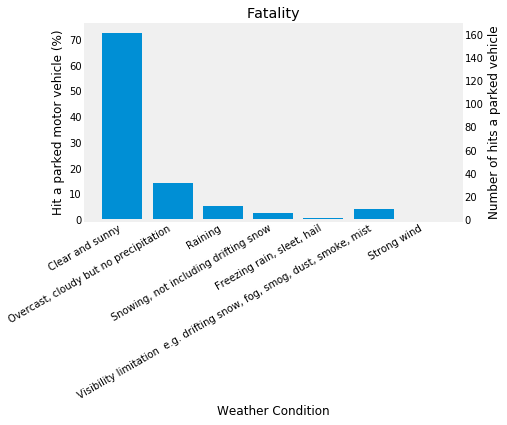

In [ ]:
## Chart 9 - Weather Condition in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_fatality['C_MNTH'].count()
weather_count = two_vehic_fatality.groupby('C_WTHR').count().iloc[:, 1]
print(weather_count.index)
weather_percent = weather_count / number_of_data * 100
print(weather_percent.head(2))
# x_data = weather_count.index
x_data =['Clear and sunny',																	
'Overcast, cloudy but no precipitation',																	
'Raining',																	
'Snowing, not including drifting snow',																	
'Freezing rain, sleet, hail',																	
'Visibility limitation  e.g. drifting snow, fog, smog, dust, smoke, mist',																	
'Strong wind']
title = 'Fatality'
x_lable = 'Weather Condition'
y1_data = weather_percent
y2_data = weather_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'weather_cond_fatality'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

## 7- Baysian Network

[Related articles](https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_4_Bayesian_Networks.ipynb)

[Related video](https://www.youtube.com/watch?v=SkC8S3wuIfg)

In [ ]:
# from pomegranate import BayesianNetwork

In [ ]:
# # Plot from 2012 onwards, because there is no solar production data in earlier years
# ax = opsd_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
# ax.set_ylabel('Fraction')
# ax.set_ylim(0, 0.3)
# ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
# plt.xticks(rotation=0);

# iris.plot(x='sepal_length', y='sepal_width')
# plt.show()

# plt.xlabel('sepal length (cm)')
# plt.ylabel('sepal width (cm)')
# plt.show()

# Balancing and Analyzing

In [ ]:
two_vehic_df = pd.read_csv("https://raw.githubusercontent.com/mtofighi/RoadCollisions/master/two_vehic_df.csv")
two_vehic_df=two_vehic_df.drop('Unnamed: 0', axis=1)
two_vehic_df.info()
two_vehic_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30255 entries, 0 to 30254
Data columns (total 17 columns):
C_MNTH    30255 non-null int64
C_WDAY    30255 non-null int64
C_HOUR    30255 non-null int64
C_VEHS    30255 non-null int64
C_RCFG    30255 non-null int64
C_WTHR    30255 non-null int64
C_RSUR    30255 non-null int64
C_RALN    30255 non-null int64
C_TRAF    30255 non-null int64
V_TYPE    30255 non-null int64
P_SEX     30255 non-null int64
P_AGE     30255 non-null int64
P_PSN     30255 non-null int64
P_ISEV    30255 non-null int64
P_SAFE    30255 non-null int64
P_USER    30255 non-null int64
V_AGE     30255 non-null int64
dtypes: int64(17)
memory usage: 3.9 MB


,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,V_AGE
0,1,1,0,2,1,1,5,1,18,1,0,25,11,2,2,1,6
1,1,1,18,2,1,1,3,3,18,1,0,34,11,2,2,1,12


In [ ]:
cat_cols = ['C_MNTH','C_WDAY', 'C_HOUR','C_RCFG' , 'C_WTHR', 'C_RSUR' , 'C_RALN' , 'C_TRAF' , 'V_TYPE' , 'P_SEX' , 'P_PSN'  ,	'P_SAFE' ,	'P_USER' ]
two_vehic_df_cat = pd.get_dummies(two_vehic_df, columns=[])
two_vehic_df_cat.head(2)

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,V_AGE
0,1,1,0,2,1,1,5,1,18,1,0,25,11,2,2,1,6
1,1,1,18,2,1,1,3,3,18,1,0,34,11,2,2,1,12


In [ ]:
two_vehic_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30255 entries, 0 to 30254
Data columns (total 17 columns):
C_MNTH    30255 non-null int64
C_WDAY    30255 non-null int64
C_HOUR    30255 non-null int64
C_VEHS    30255 non-null int64
C_RCFG    30255 non-null int64
C_WTHR    30255 non-null int64
C_RSUR    30255 non-null int64
C_RALN    30255 non-null int64
C_TRAF    30255 non-null int64
V_TYPE    30255 non-null int64
P_SEX     30255 non-null int64
P_AGE     30255 non-null int64
P_PSN     30255 non-null int64
P_ISEV    30255 non-null int64
P_SAFE    30255 non-null int64
P_USER    30255 non-null int64
V_AGE     30255 non-null int64
dtypes: int64(17)
memory usage: 3.9 MB


## Balancing Dataset
https://elitedatascience.com/imbalanced-classes

In [ ]:
two_vehic_df_cat_majority = two_vehic_df_cat[two_vehic_df_cat.P_ISEV==2]
two_vehic_df_cat_minority = two_vehic_df_cat[two_vehic_df_cat.P_ISEV==1]

In [ ]:
print(two_vehic_df_cat_majority.shape[0])
print(two_vehic_df_cat_minority.shape[0])

21904
8129


In [ ]:
from sklearn.utils import resample
# Downsample majority class
two_vehic_df_cat_majority_downsampled = resample(two_vehic_df_cat_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=two_vehic_df_cat_minority.shape[0],     # to match minority class
                                 random_state=123) # reproducible results
two_vehic_df_cat_majority_downsampled.shape[0]

8129

In [ ]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([two_vehic_df_cat_majority_downsampled, two_vehic_df_cat_minority])
df_downsampled.P_ISEV.value_counts()

2    8129
1    8129
Name: P_ISEV, dtype: int64

# Creating Train and Test sets

In [ ]:
from sklearn.model_selection import train_test_split
# Separate input features (X) and target variable (y)
labels = df_downsampled['P_ISEV']
features_data = df_downsampled.drop('P_ISEV', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features_data, labels, test_size=0.2, random_state=100)

# Logistic Regression

In [ ]:
# Train model on train set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression().fit(X_train, y_train)
 
# Predict on test set
pred_y = clf.predict(X_test)
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y) )


0.6033210332103321


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose some parameter combinations to try
params = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
rf_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, scoring=acc_scorer, n_jobs=-1, verbose=1, cv=10)
rf_grid_seaech = rf_cv.fit(X_train,y_train)
# the best combination of parameters
print(f"rf_cv.best_params_:{rf_cv.best_params_}")

print( f"rf_cv.best_score_: {rf_cv.best_score_}")

# Test
y_pred = rf_cv.predict(X_test)
accuracy_score(y_test, y_pred)

# Train the tuned RF on whole data
n_estimators = rf_cv.best_params_['n_estimators']
max_features = rf_cv.best_params_['max_features']
criterion = rf_cv.best_params_['criterion']
max_depth = rf_cv.best_params_['max_depth']
min_samples_leaf = rf_cv.best_params_['min_samples_leaf']
min_samples_split = rf_cv.best_params_['min_samples_split']

rf_tuned = RandomForestClassifier(random_state=42,
                                  n_estimators= n_estimators,
                                  criterion=criterion,
                                  max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split).fit(X_train,y_train)
print(f"Accuracy of the tuned model: {accuracy_score(y_test, rf_tuned.predict(X_test))}")

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 694 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 1694 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 3094 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4894 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:  3.7min finished


rf_cv.best_params_:{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 9}
rf_cv.best_score_: 0.6348608334614794
Accuracy of the tuned model: 0.6439114391143912


## Random Forest Feature Importance

P_AGE: 0.184
C_HOUR: 0.14
V_AGE: 0.139
C_MNTH: 0.112
C_WDAY: 0.0913
C_WTHR: 0.0407
C_RSUR: 0.0387
C_VEHS: 0.0385
C_RALN: 0.0372
P_PSN: 0.0362
C_RCFG: 0.0301
P_SAFE: 0.0275
V_TYPE: 0.0267
C_TRAF: 0.0216
P_SEX: 0.0201
P_USER: 0.0157


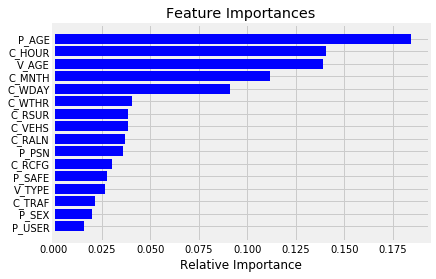

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
x = features_data
y = labels
rnd_clf.fit(x, y)
features = x.columns
feature_importance = {}
for name, importance in zip(x.columns, rnd_clf.feature_importances_):
  feature_importance[name] = importance
  
feature_importance = [(k, feature_importance[k]) for k in sorted(feature_importance, key=feature_importance.get, reverse=True)]
for k, v in feature_importance:
  print(f"{k}: {v:.3}")

importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.svm import SVC
params = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
svc_cv=GridSearchCV(SVC(random_state=42,probability=True),params,n_jobs=-1, verbose=1, cv=10).fit(X_train,y_train)
print(f"Tuned hpyerparameters :(best parameters) {svc_cv.best_params_}")
print(f"Accuracy of cross validation is {svc_cv.best_score_}")
y_pred = svc_cv.predict(X_test)
accuracy_score(y_test, y_pred)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 38.5min


KeyboardInterrupt: ignored